# Self Case Study-2_Severstal: Steel Defect Detection - Can you detect and classify defects in steel?

## Section-II

## 4. Preprocessing, Feature Engineering and applying various models

## 4.1 Preprocessing and Feature Engineering

In [1]:
#importing usefull library
import pandas as pd
import numpy as np
import os
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling as pp
from tqdm import tqdm
import sys
from PIL import Image, ImageDraw
from PIL import ImagePath
import urllib
import tensorflow as tf
# import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy import save ,load
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, BatchNormalization, Dropout, Input, MaxPool2D , Flatten


In [ ]:
# os.chdir('C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2')
# os.getcwd()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1 = "/content/drive/MyDrive/Case Study-2/train_images.zip"

In [4]:
!pip install pyunpack
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 2.2 MB/s 


In [5]:
mkdir train_images

In [6]:
#extracting images
from pyunpack import Archive 
Archive(path1).extractall('/content/train_images')

In [7]:
pd.options.display.max_columns=50
train_df = pd.read_csv("/content/drive/MyDrive/Case Study-2/train.csv")
# train_df = pd.read_csv("train.csv")
train_df.shape

(7095, 3)

In [ ]:
train_df.head(5)

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg        3  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg        1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg        4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg        3  229501 11 229741 33 229981 55 230221 77 230468...

In [8]:
# train_images = os.listdir("C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images")
train_images = os.listdir("/content/train_images")
len(train_images)

12568

In [9]:
train_images_df = pd.DataFrame(train_images,columns =['ImageId'])
train_images_df.head()

ImageId
0  bac68f2c3.jpg
1  c2234a956.jpg
2  d7aa8391c.jpg
3  fe56055d0.jpg
4  49d28224c.jpg

In [10]:
#mearging train_df & train_images_df
train_df_mearged = pd.merge(train_df,train_images_df,how = 'outer',on = ['ImageId','ImageId'])
train_df_mearged.head(5)

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg      1.0  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg      3.0  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg      1.0  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg      4.0  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg      3.0  229501 11 229741 33 229981 55 230221 77 230468...

In [11]:
train_df_mearged.shape

(12997, 3)

In [12]:
train_df_mearged.isnull().sum()

ImageId             0
ClassId          5902
EncodedPixels    5902
dtype: int64

In [ ]:
7095+5902

12997

In [13]:
# replacing 'NaN' values of class ID of non-defective images with '0'
train_df_mearged['ClassId'].fillna(value=0,inplace=True)
train_df_mearged.head()

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg      1.0  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg      3.0  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg      1.0  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg      4.0  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg      3.0  229501 11 229741 33 229981 55 230221 77 230468...

In [14]:
train_df_mearged.tail()

ImageId  ClassId EncodedPixels
12992  ceae95bea.jpg      0.0           NaN
12993  288314368.jpg      0.0           NaN
12994  ae765c316.jpg      0.0           NaN
12995  034b387c3.jpg      0.0           NaN
12996  57461a858.jpg      0.0           NaN

**The below function creates the dataframe of paths of all images of given dataset**

In [15]:
# The below function creates the dataframe of path of the images of given dataset
def return_file_names_df(root_dir):
    lst1 = []
    for path, dirc, files in os.walk(root_dir):
        for name in files:
            if name.endswith('jpg'):
                lst1.append(path + '/' + name)
    data_df = pd.DataFrame((lst1), columns = ["image_path"])
    pd.set_option('display.max_colwidth', None)
#     pd.set_option("display.max_rows", None)
    return data_df

In [16]:
# train_images_path = "C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/train_images"
train_images_path = "/content/train_images"
rfn_df = return_file_names_df(train_images_path)

In [17]:
rfn_df.head()

image_path
0  /content/train_images/bac68f2c3.jpg
1  /content/train_images/c2234a956.jpg
2  /content/train_images/d7aa8391c.jpg
3  /content/train_images/fe56055d0.jpg
4  /content/train_images/49d28224c.jpg

In [18]:
rfn_df.shape

(12568, 1)

**The below function creates dataframe of paths of the defective images from the dataset**

In [19]:
def return_file_names_df1(root_dir):
    list1 = []
    list2 = []
    for path, dirc, files in os.walk(root_dir):
        for name in files:
            list1.append(name)
    for index, row in train_df.iterrows():
        if row.ImageId in list1 and row.ClassId !=0: 
            list2.append(path + '/' + row.ImageId)            
    data_df = pd.DataFrame((list2), columns = ["image_path"])
    pd.set_option('display.max_colwidth', None)
    return data_df

In [20]:
df1 = return_file_names_df1(train_images_path)
df1.head()

image_path
0  /content/train_images/0002cc93b.jpg
1  /content/train_images/0007a71bf.jpg
2  /content/train_images/000a4bcdd.jpg
3  /content/train_images/000f6bf48.jpg
4  /content/train_images/0014fce06.jpg

In [21]:
df1.shape

(7095, 1)

**Defining colour coding for given classes.**

In [ ]:
colourmap = [[0, 0, 0], [255, 105, 180], [ 180,255,105],[ 105, 180,255], [255, 255,105]]
classes = [0,1,2,3,4]  
classes_tocolour_ =   dict({0: [0, 0, 0], 1: [255, 105, 180], 2:  [180,255,105], 3:[105, 180,255], 4: [ 255, 255,105]})

**Below code generates numpy array of shape of the given images from the EncodedPixels given in 'train' csv file**

In [ ]:
train_numpy_masks = []
for index, row in tqdm(train_df_mearged.iterrows()):
    img = np.zeros(1600*256, dtype=np.uint8)    
    if row.ClassId !=0:
        p = row.EncodedPixels.split()
        starts, lengths = [np.asarray(x, dtype=int) for x in (p[0::2], p[1::2])]
        starts -= 1
        ends = starts + lengths
        for lo, hi in zip(starts, ends):
            img[lo:hi] = row.ClassId 
        img = img.reshape(1600,256).T
        train_numpy_masks.append(img)    


12997it [00:16, 775.07it/s] 


In [ ]:
del train_numpy_masks

In [ ]:
# len(train_numpy_masks)

In [ ]:
train_numpy_masks[0].shape

**The below code adds the color map into numpy array generated above**

In [ ]:
RGB_image_list = []
for img in tqdm(train_numpy_masks):
    RGB_image = []
    for i in img :
        lst1 = []
        for j in i :
            lst1.append(classes_tocolour.get(j))  
        RGB_image.append(lst1)
    c = np.array(RGB_image)
    RGB_image_list.append(c)

100%|████████████████████████████████████████████████████████████████████████████| 7095/7095 [1:10:00<00:00,  1.69it/s]


In [ ]:
# RGB_image_df = pd.DataFrame(RGB_image_list, dtype=np.int8)

In [ ]:
RGB_image_arr = np.array(RGB_image_list, dtype=np.int8)

In [ ]:
sys.getsizeof(RGB_image_arr)

160

**saving 'RGB_image_arr' into pickel format**

In [ ]:
# # saving 'RGB_image_arr' into pickel file
# import pickle
# with open('RGB_image_arr.pkl', 'wb') as f:
#     pickle.dump(RGB_image_arr, f)

#### loading previously saved pickle file

In [ ]:
import pickle
file = open("RGB_image_arr.pkl",'rb')
# file = open("/content/drive/MyDrive/Case_Study-2/RGB_image_arr.pkl",'rb')
RGB_image_arr = pickle.load(file)
file.close()

In [ ]:
RGB_image_arr.shape

(7095, 256, 1600, 3)

In [ ]:
print(RGB_image_arr.__sizeof__())

160


**Generating ans saving mask images for given images of dataset**

In [ ]:
mkdir output

In [ ]:
# p = "C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/output/"
p = "/content/output/"
for k, (i, j) in enumerate(zip(RGB_image_arr, train_df['ImageId'].values)):
    mask_img = Image.fromarray(i.astype(np.uint8))
    mask_name = j.split('.')[0] + '_' + str(k) + '_mask.jpg'
    mask_path = os.path.join(p, mask_name)
    mask_img.save(mask_path)

In [ ]:
mkdir output_5d

In [ ]:
q = "C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/output_5d/"

In [ ]:
colourmap = [[0, 0, 0], [255, 105, 180], [ 180,255,105],[ 105, 180,255], [255, 255,105]]

for k, (mask, j) in enumerate(zip(RGB_image_arr, train_df['ImageId'].values)):
    output_mask = []
    for i , color in enumerate(colourmap):
        cmap = np.all(np.equal(mask , color ), axis = -1)
        cmap.astype(int)
        output_mask.append(cmap)
    output_mask = np.stack(output_mask , axis = -1)
    output_mask = output_mask.astype(np.uint8)
    
    mask_name = j.split('.')[0] + '_' + str(k) + '.npy'
    mask_path = os.path.join(q, mask_name)
    save(mask_path, output_mask)

In [ ]:
train_masks_5d = os.listdir("C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/output_5d")
len(train_masks_5d)

7095

**Extracting mask images stored previously**

In [22]:
mkdir mask_images1

In [23]:
# extracting mask images saved previously
# path2 = "/content/output1.zip"
path2 = "/content/drive/MyDrive/Case Study-2/output1.zip"

from pyunpack import Archive 
Archive(path2).extractall('/content/mask_images1')


In [24]:
# train_masks = os.listdir("C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/output1")
train_masks = os.listdir("/content/mask_images1/output1")
len(train_masks)

7095

In [25]:
df1['mask_path'] = train_masks
df1.head()

image_path                mask_path
0  /content/train_images/0002cc93b.jpg  84e51db1c_3651_mask.png
1  /content/train_images/0007a71bf.jpg  db62a970a_6107_mask.png
2  /content/train_images/000a4bcdd.jpg  4ef6c54c9_2147_mask.png
3  /content/train_images/000f6bf48.jpg  684c99351_2823_mask.png
4  /content/train_images/0014fce06.jpg  570cb5438_2343_mask.png

In [26]:
# df1['mask_path'] = "C:/Users/Vikrant Mohite/Desktop/Applied AI/Case Study-2/output/" + df1['mask_path']
df1['mask_path'] = "/content/mask_images1/output1/" + df1['mask_path']

In [27]:
df1.head(10)

image_path  \
0  /content/train_images/0002cc93b.jpg   
1  /content/train_images/0007a71bf.jpg   
2  /content/train_images/000a4bcdd.jpg   
3  /content/train_images/000f6bf48.jpg   
4  /content/train_images/0014fce06.jpg   
5  /content/train_images/0025bde0c.jpg   
6  /content/train_images/0025bde0c.jpg   
7  /content/train_images/002af848d.jpg   
8  /content/train_images/002fc4e19.jpg   
9  /content/train_images/002fc4e19.jpg   

                                               mask_path  
0  /content/mask_images1/output1/84e51db1c_3651_mask.png  
1  /content/mask_images1/output1/db62a970a_6107_mask.png  
2  /content/mask_images1/output1/4ef6c54c9_2147_mask.png  
3  /content/mask_images1/output1/684c99351_2823_mask.png  
4  /content/mask_images1/output1/570cb5438_2343_mask.png  
5  /content/mask_images1/output1/8f81e6d35_3949_mask.png  
6  /content/mask_images1/output1/9c005a770_4270_mask.png  
7  /content/mask_images1/output1/a1f5481df_4442_mask.png  
8   /content/mask_images1/output1/0bb37f2aa_323_mask.png  
9  /content/mask_images1/output1/35a8b85a8_1459_mask.png

In [28]:
df1['image_path'] = sorted(df1['image_path'])
df1['mask_path'] = sorted(df1['mask_path'])
df1

image_path  \
0     /content/train_images/0002cc93b.jpg   
1     /content/train_images/0007a71bf.jpg   
2     /content/train_images/000a4bcdd.jpg   
3     /content/train_images/000f6bf48.jpg   
4     /content/train_images/0014fce06.jpg   
...                                   ...   
7090  /content/train_images/ffcf72ecf.jpg   
7091  /content/train_images/fff02e9c5.jpg   
7092  /content/train_images/fffe98443.jpg   
7093  /content/train_images/ffff4eaa8.jpg   
7094  /content/train_images/ffffd67df.jpg   

                                                  mask_path  
0        /content/mask_images1/output1/0002cc93b_0_mask.png  
1        /content/mask_images1/output1/0007a71bf_1_mask.png  
2        /content/mask_images1/output1/000a4bcdd_2_mask.png  
3        /content/mask_images1/output1/000f6bf48_3_mask.png  
4        /content/mask_images1/output1/0014fce06_4_mask.png  
...                                                     ...  
7090  /content/mask_images1/output1/ffcf72ecf_7090_mask.png  
7091  /content/mask_images1/output1/fff02e9c5_7091_mask.png  
7092  /content/mask_images1/output1/fffe98443_7092_mask.png  
7093  /content/mask_images1/output1/ffff4eaa8_7093_mask.png  
7094  /content/mask_images1/output1/ffffd67df_7094_mask.png  

[7095 rows x 2 columns]

In [ ]:
mkdir mask_5d

In [ ]:
q = '/content/mask_5d'

In [ ]:
colourmap = [[0, 0, 0], [255, 105, 180], [ 180,255,105],[ 105, 180,255], [255, 255,105]]

for k, (mask, j) in enumerate(zip(df1['mask_path'], train_df['ImageId'].values)):
    output_mask = []
    for i , color in enumerate(colourmap):
        image = cv2.imread(mask, cv2.IMREAD_UNCHANGED)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cmap = np.all(np.equal(image , color ), axis = -1)
        cmap.astype(int)
        output_mask.append(cmap)
    output_mask = np.stack(output_mask , axis = -1)
    output_mask = output_mask.astype(np.uint8)
    
    mask_name = j.split('.')[0] + '_' + str(k) + '.npy'
    mask_path1 = os.path.join(q, mask_name)
    save(mask_path1, output_mask)

In [ ]:
!zip -r /content/mask_5d.zip /content/mask_5d

In [29]:
mkdir mask_images3

In [30]:
# extracting mask images saved previously
# path3 = "/content/output_5d.zip"
# path3 = "/content/drive/MyDrive/Case_Study-2/output_5d.zip"
path3 = "/content/drive/MyDrive/Case Study-2/mask_5d.zip"
from pyunpack import Archive 
Archive(path3).extractall('/content/mask_images3')


In [31]:
# train_masks_5d = os.listdir("/content/mask_images2/output_5d")
# train_masks_5d = os.listdir("/content/mask_5d")
train_masks_5d = os.listdir("/content/mask_images3/mask_5d")
len(train_masks_5d)

7095

In [32]:
df1['mask_path_5d'] = train_masks_5d 
df1.head()

image_path  \
0  /content/train_images/0002cc93b.jpg   
1  /content/train_images/0007a71bf.jpg   
2  /content/train_images/000a4bcdd.jpg   
3  /content/train_images/000f6bf48.jpg   
4  /content/train_images/0014fce06.jpg   

                                            mask_path        mask_path_5d  
0  /content/mask_images1/output1/0002cc93b_0_mask.png  ab13f368e_4703.npy  
1  /content/mask_images1/output1/0007a71bf_1_mask.png  29124169b_1131.npy  
2  /content/mask_images1/output1/000a4bcdd_2_mask.png  2e4fefc28_1268.npy  
3  /content/mask_images1/output1/000f6bf48_3_mask.png  86aae8998_3700.npy  
4  /content/mask_images1/output1/0014fce06_4_mask.png  7de00739f_3445.npy

In [33]:
# df1['mask_path_5d'] = "/content/mask_images2/output_5d/" + df1['mask_path_5d']

df1['mask_path_5d'] = "/content/mask_images3/mask_5d/" + df1['mask_path_5d']

In [34]:
df1

image_path  \
0     /content/train_images/0002cc93b.jpg   
1     /content/train_images/0007a71bf.jpg   
2     /content/train_images/000a4bcdd.jpg   
3     /content/train_images/000f6bf48.jpg   
4     /content/train_images/0014fce06.jpg   
...                                   ...   
7090  /content/train_images/ffcf72ecf.jpg   
7091  /content/train_images/fff02e9c5.jpg   
7092  /content/train_images/fffe98443.jpg   
7093  /content/train_images/ffff4eaa8.jpg   
7094  /content/train_images/ffffd67df.jpg   

                                                  mask_path  \
0        /content/mask_images1/output1/0002cc93b_0_mask.png   
1        /content/mask_images1/output1/0007a71bf_1_mask.png   
2        /content/mask_images1/output1/000a4bcdd_2_mask.png   
3        /content/mask_images1/output1/000f6bf48_3_mask.png   
4        /content/mask_images1/output1/0014fce06_4_mask.png   
...                                                     ...   
7090  /content/mask_images1/output1/ffcf72ecf_7090_mask.png   
7091  /content/mask_images1/output1/fff02e9c5_7091_mask.png   
7092  /content/mask_images1/output1/fffe98443_7092_mask.png   
7093  /content/mask_images1/output1/ffff4eaa8_7093_mask.png   
7094  /content/mask_images1/output1/ffffd67df_7094_mask.png   

                                          mask_path_5d  
0     /content/mask_images3/mask_5d/ab13f368e_4703.npy  
1     /content/mask_images3/mask_5d/29124169b_1131.npy  
2     /content/mask_images3/mask_5d/2e4fefc28_1268.npy  
3     /content/mask_images3/mask_5d/86aae8998_3700.npy  
4     /content/mask_images3/mask_5d/7de00739f_3445.npy  
...                                                ...  
7090  /content/mask_images3/mask_5d/74cd21b41_3207.npy  
7091  /content/mask_images3/mask_5d/def2ff0c5_6212.npy  
7092  /content/mask_images3/mask_5d/f2444c793_6723.npy  
7093  /content/mask_images3/mask_5d/ba54b162d_5166.npy  
7094    /content/mask_images3/mask_5d/012a9a4c7_36.npy  

[7095 rows x 3 columns]

In [35]:
df1['image_path'] = sorted(df1['image_path'])
df1['mask_path'] = sorted(df1['mask_path'])
df1['mask_path_5d'] = sorted(df1['mask_path_5d'])
df1

image_path  \
0     /content/train_images/0002cc93b.jpg   
1     /content/train_images/0007a71bf.jpg   
2     /content/train_images/000a4bcdd.jpg   
3     /content/train_images/000f6bf48.jpg   
4     /content/train_images/0014fce06.jpg   
...                                   ...   
7090  /content/train_images/ffcf72ecf.jpg   
7091  /content/train_images/fff02e9c5.jpg   
7092  /content/train_images/fffe98443.jpg   
7093  /content/train_images/ffff4eaa8.jpg   
7094  /content/train_images/ffffd67df.jpg   

                                                  mask_path  \
0        /content/mask_images1/output1/0002cc93b_0_mask.png   
1        /content/mask_images1/output1/0007a71bf_1_mask.png   
2        /content/mask_images1/output1/000a4bcdd_2_mask.png   
3        /content/mask_images1/output1/000f6bf48_3_mask.png   
4        /content/mask_images1/output1/0014fce06_4_mask.png   
...                                                     ...   
7090  /content/mask_images1/output1/ffcf72ecf_7090_mask.png   
7091  /content/mask_images1/output1/fff02e9c5_7091_mask.png   
7092  /content/mask_images1/output1/fffe98443_7092_mask.png   
7093  /content/mask_images1/output1/ffff4eaa8_7093_mask.png   
7094  /content/mask_images1/output1/ffffd67df_7094_mask.png   

                                          mask_path_5d  
0        /content/mask_images3/mask_5d/0002cc93b_0.npy  
1        /content/mask_images3/mask_5d/0007a71bf_1.npy  
2        /content/mask_images3/mask_5d/000a4bcdd_2.npy  
3        /content/mask_images3/mask_5d/000f6bf48_3.npy  
4        /content/mask_images3/mask_5d/0014fce06_4.npy  
...                                                ...  
7090  /content/mask_images3/mask_5d/ffcf72ecf_7090.npy  
7091  /content/mask_images3/mask_5d/fff02e9c5_7091.npy  
7092  /content/mask_images3/mask_5d/fffe98443_7092.npy  
7093  /content/mask_images3/mask_5d/ffff4eaa8_7093.npy  
7094  /content/mask_images3/mask_5d/ffffd67df_7094.npy  

[7095 rows x 3 columns]

In [36]:
# d = '/content/mask_5d'
img1 = load(df1['mask_path_5d'][1960])


In [37]:
np.sum(img1)

409600

In [ ]:
!zip -r /content/mask_5d.zip /content/mask_5d

In [ ]:
image = cv2.imread(df1['mask_path'][500], cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
colourmap = [[0, 0, 0], [255, 105, 180], [ 180,255,105],[ 105, 180,255], [255, 255,105]]


output_mask = []
for i , color in enumerate(colourmap):
    cmap = np.all(np.equal(image , color ), axis = -1)
    cmap.astype(int)
    output_mask.append(cmap)
output_mask = np.stack(output_mask , axis = -1)
output_mask = output_mask.astype(np.uint8)


In [ ]:
np.sum(output_mask)

409600

In [ ]:
mkdir mask_5d

In [ ]:
q = '/content/mask_5d'

In [ ]:
colourmap = [[0, 0, 0], [255, 105, 180], [ 180,255,105],[ 105, 180,255], [255, 255,105]]

for k, (mask, j) in enumerate(zip(df1['mask_path'], train_df['ImageId'].values)):
    output_mask = []
    for i , color in enumerate(colourmap):
        image = cv2.imread(mask, cv2.IMREAD_UNCHANGED)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cmap = np.all(np.equal(image , color ), axis = -1)
        cmap.astype(int)
        output_mask.append(cmap)
    output_mask = np.stack(output_mask , axis = -1)
    output_mask = output_mask.astype(np.uint8)
    
    mask_name = j.split('.')[0] + '_' + str(k) + '.npy'
    mask_path1 = os.path.join(q, mask_name)
    save(mask_path1, output_mask)

In [ ]:
image = cv2.imread(df1['mask_path'][500], cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
image = cv2.imread(df1['mask_path'][500], cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:

img = np.argmax(img1,axis= -1) #256 X 1600
# RGB_image = []
# for outer in img1 :
#   col = []
#   for inner in outer :
#     col.append(classes_tocolour_.get(inner))  
#   RGB_image.append(col)
# return np.array(RGB_image) #256 X 1600 X 3 

In [ ]:
np.sum(np.argmax(img1,axis= -1))

0

In [38]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.3, random_state=42)
train.shape, test.shape

((4966, 3), (2129, 3))

In [39]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.3, random_state=42)
test, validation = train_test_split(test, test_size=0.3, random_state=42)
test.shape, validation.shape

((1490, 3), (639, 3))

**Visualizing the train images and the equivalent masks.**

In [ ]:
images_ = train['image_path'].values
masks_ = train["mask_path"].values
lst1 = np.arange(len(images_))
len(lst1)
np.random.choice(lst1, size = 5, replace = False)

array([3679, 3191, 5110, 1582, 4825])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

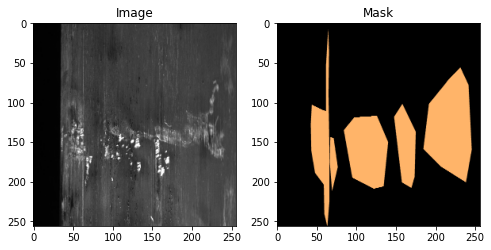

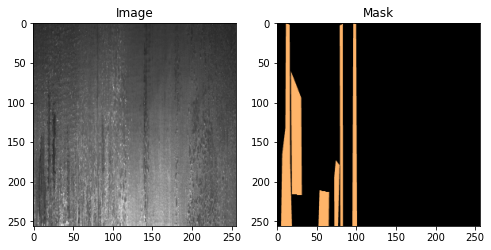

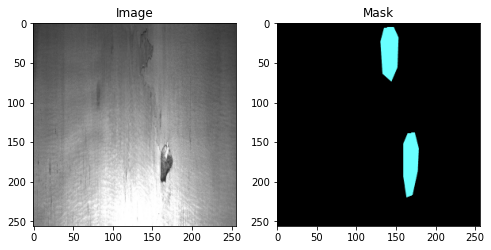

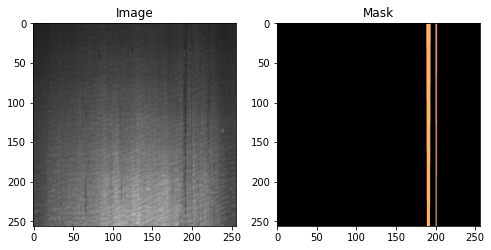

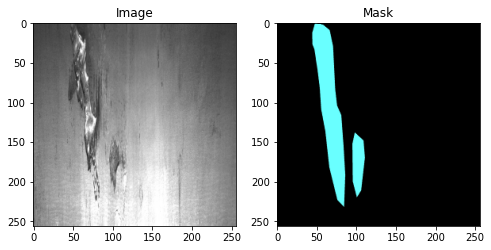

In [ ]:
# Visualizing the train images and the equivalent masks.
import random
ids = np.random.choice(lst1, size = 5, replace = False)
for i in ids:
  image = cv2.imread(images_[i], cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image, (256, 256),  interpolation = cv2.INTER_AREA)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = np.expand_dims(image, axis=0)

  mask  = cv2.imread(masks_[i], cv2.IMREAD_UNCHANGED)
  mask = cv2.resize(mask, (256, 256),  interpolation = cv2.INTER_AREA)

  fig = plt.figure(figsize=(8,4))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.imshow(image[0,:,:])
  ax2=fig.add_subplot(1, 2, 2)
  ax2.imshow(mask)
  ax1.title.set_text('Image')
  ax2.title.set_text('Mask')
  plt.show()

## 4.2 Generating Train & Test datasets for further training 

In [46]:
import imgaug.augmenters as iaa
# check the imgaug documentations for more augmentations
aug2 = iaa.Fliplr(1)
aug3 = iaa.Flipud(1)
aug4 = iaa.Emboss(alpha=(1), strength=1)
aug5 = iaa.DirectedEdgeDetect(alpha=(0.8), direction=(1.0))
aug6 = iaa.Sharpen(alpha=(1.0), lightness=(1.5))

In [ ]:
# def get_key(val, my_dict):
#   for key, value in my_dict.items():
#     if (val == value).all():
#       return key

In [ ]:
classes_tocolour_ =   dict({0: [0, 0, 0], 1: [255, 105, 180], 2:  [180,255,105], 3:[105, 180,255], 4: [ 255, 255,105]})

In [ ]:
# def NormalizeData(data):
#   c =  (data - np.min(data)) / (np.max(data) - np.min(data))
#   return c

In [ ]:
# class Dataset:
#     # we will be modifying this CLASSES according to your data/problems
#     CLASSES = [0,1,2,3,4]

#     classes_tocolour_ =   dict({0: [0, 0, 0], 1: [255, 105, 180], 2:  [180,255,105], 3:[105, 180,255], 4: [ 255, 255,105]})
    
#     # the parameters needs to changed based on your requirements
#     # here we are collecting the file_names because in our dataset, both our images and maks will have same file name
#     # ex: fil_name.jpg   file_name.mask.jpg
#     def __init__(self, file_names , w, h, classes=None):
        
#         self.ids = file_names
#         # the paths of images
#         self.images_fps   = [image_id for image_id in self.ids["image_path"]]
#         # the paths of segmentation images
#         self.masks_fps    = [image_id for image_id in self.ids["mask_path"]]
#         # giving labels for each class
#         self.class_values = [self.CLASSES.index(cls) for cls in classes]
#         self.w = w
#         self.h = h
    

#     def __getitem__(self, i): #https://omkarpathak.in/2018/04/11/python-getitem-and-setitem/
        
#         # read data
#         image = cv2.imread(self.images_fps[i], cv2.IMREAD_UNCHANGED)
#         image = cv2.resize(image, (self.w, self.h),  interpolation = cv2.INTER_AREA)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype('float')
#         # image = NormalizeData(image)

        
#         mask  = cv2.imread(self.masks_fps[i])
#         mask = cv2.resize(mask, (self.w, self.h),  interpolation = cv2.INTER_AREA)
#         mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB) 

#         s = []
#         for d in mask:
#           k = []
#           for j in d:
#             p = get_key(j, classes_tocolour_)
#             k.append(p)
#           s.append(k)
#         mask = np.array(s)
        

        
#         image_mask = mask
  
       
#         image_masks = [(image_mask == v) for v in self.class_values]
        
#         image_mask = np.stack(image_masks, axis=-1).astype('float')
#         # image_mask = cv2.resize(image_mask, (self.w, self.h))
        
#         a = np.random.uniform()
#         if a<0.2:
#             image = aug2.augment_image(image)
#             image_mask = aug2.augment_image(image_mask)
#         elif a<0.4:
#             image = aug3.augment_image(image)
#             image_mask = aug3.augment_image(image_mask)
#         elif a<0.6:
#             image = aug4.augment_image(image)
#             image_mask = aug4.augment_image(image_mask)
#         elif a<0.8:
#             image = aug5.augment_image(image)
#             image_mask = image_mask
#         else:
#             image = aug6.augment_image(image)
#             image_mask = aug6.augment_image(image_mask)
#         # mask = NormalizeData(mask)    
#         return image, image_mask
        
#     def __len__(self):
#         return len(self.ids)

In [40]:
class Dataset:
    
    def __init__(self, data_df):
        
        self.images_fps   = data_df['image_path'].values
        
        self.masks_fps  = data_df['mask_path_5d'].values
    
#         self.w = 256
#         self.h = 1600
    

    def __getitem__(self, i): #https://omkarpathak.in/2018/04/11/python-getitem-and-setitem/
        
        # read data
        image = cv2.imread(self.images_fps[i], cv2.IMREAD_UNCHANGED)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype('float')
        # image = NormalizeData(image)
        
        image_mask = load(self.masks_fps[i])
        
        image_mask = image_mask.astype('float')
        
        a = np.random.uniform()
        if a<0.2:
            image = aug2.augment_image(image)
            image_mask = aug2.augment_image(image_mask)
        elif a<0.4:
            image = aug3.augment_image(image)
            image_mask = aug3.augment_image(image_mask)
        elif a<0.6:
            image = aug4.augment_image(image)
            image_mask = aug4.augment_image(image_mask)
        elif a<0.8:
            image = aug5.augment_image(image)
            image_mask = image_mask
        else:
            image = aug6.augment_image(image)
            image_mask = aug6.augment_image(image_mask)
        # mask = NormalizeData(mask)    
        return image, image_mask
        
    def __len__(self):
        return len(self.images_fps)

In [41]:
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return tuple(batch)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [ ]:
# CLASSES = [0, 1, 2, 3, 4]
# train_dataset = Dataset(train, 256, 256, classes=CLASSES)
# test_dataset  = Dataset(test, 256, 256, classes=CLASSES)

In [42]:
train_dataset = Dataset(train)
test_dataset  = Dataset(test)

In [43]:
len(test_dataset)

1490

In [44]:
len(train_dataset)

4966

In [47]:
np.sum(train_dataset[1800][1])

409600.0

In [ ]:
BATCH_SIZE=10
train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = Dataloder(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

assert train_dataloader[0][0].shape == (BATCH_SIZE, 256, 1600, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, 256, 1600, 5)

print(train_dataloader[0][0].shape)
print(train_dataloader[0][1].shape)
print(len(train_dataloader))
print(len(test_dataloader))
type(train_dataset[0])

(10, 256, 1600, 3)
(10, 256, 1600, 5)
496
149


tuple

In [ ]:
# image_masks[4].shape

(256, 1600, 3)

## 4.3 Applying Unet to segment the images

In [11]:
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.4 MB/s 


In [49]:
tf.keras.backend.clear_session()

In [12]:
# We are importing the pretrained unet from the segmentation models.
# https://github.com/qubvel/segmentation_models

tf.keras.backend.clear_session()
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models.metrics import iou_score
sm.set_framework('tf.keras')

tf.keras.backend.set_image_data_format('channels_last')
#from tensorflow.keras.applications.resnet import preprocess_input

# loading the unet model and using the resnet 50 and initialized weights with Imagenet weights.
# "classes" :different types of classes in the dataset.
backbone = 'resnet50'
preprocess_input = sm.get_preprocessing(backbone)

Segmentation Models: using `keras` framework.


In [ ]:
IMAGE_SHAPE = (256, 1600, 3)

In [ ]:
model = Unet(backbone_name = backbone, input_shape = IMAGE_SHAPE, classes = 5, activation = 'softmax', encoder_freeze = True,
             encoder_weights = 'imagenet', decoder_block_type = 'upsampling')

94592056/94592056 [==============================] - 5s 0us/step


In [ ]:
import tensorflow as tf
from keras.callbacks import Callback

class stop_at_iou(Callback):
        def __init__(self,model):
          self.model = model
          self.iou = .99
        def on_epoch_end(self,epoch,logs={}):
            if logs.get('val_iou_score') >= self.iou:
                 self.model.stop_training = True
            return 

In [ ]:
# stopper = stop_at_iou(model)

In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
focal_loss = sm.losses.cce_dice_loss
model.compile(optim, focal_loss, metrics=[iou_score])
callbacks = [callbacks.ModelCheckpoint('./best_model.h5', save_weights_only = True, save_best_only = True, \
                                       mode = 'max', monitor = 'val_iou_score', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor = 'val_iou_score', patience = 3, mode = 'max', verbose = 1,min_lr=0.0001,factor=0.2)
]

In [ ]:
history = model.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=8,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/8
56/56 [==============================] - ETA: 0s - loss: 0.8481 - iou_score: 0.2125
Epoch 1: val_iou_score improved from -inf to 0.01705, saving model to ./best_model.h5
56/56 [==============================] - 1000s 18s/step - loss: 0.8481 - iou_score: 0.2125 - val_loss: 4.1532 - val_iou_score: 0.0171 - lr: 0.0090
Epoch 2/8
56/56 [==============================] - ETA: 0s - loss: 0.7983 - iou_score: 0.2298
Epoch 2: val_iou_score improved from 0.01705 to 0.14673, saving model to ./best_model.h5
56/56 [==============================] - 901s 16s/step - loss: 0.7983 - iou_score: 0.2298 - val_loss: 1.0848 - val_iou_score: 0.1467 - lr: 0.0090
Epoch 3/8
56/56 [==============================] - ETA: 0s - loss: 0.7798 - iou_score: 0.2443
Epoch 3: val_iou_score improved from 0.14673 to 0.18396, saving model to ./best_model.h5
56/56 [==============================] - 806s 15s/step - loss: 0.7798 - iou_score: 0.2443 - val_loss: 1.0159 - val_iou_score: 0.1840 - lr: 0.0090
Epoch 4/8
56/56

In [ ]:
history = model.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=50,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/50
56/56 [==============================] - ETA: 0s - loss: 0.9464 - iou_score: 0.1605
Epoch 1: val_iou_score improved from -inf to 0.03908, saving model to ./best_model.h5
56/56 [==============================] - 201s 3s/step - loss: 0.9464 - iou_score: 0.1605 - val_loss: 1.8377 - val_iou_score: 0.0391 - lr: 0.0010
Epoch 2/50
56/56 [==============================] - ETA: 0s - loss: 0.7054 - iou_score: 0.2933
Epoch 2: val_iou_score improved from 0.03908 to 0.22526, saving model to ./best_model.h5
56/56 [==============================] - 170s 3s/step - loss: 0.7054 - iou_score: 0.2933 - val_loss: 0.8251 - val_iou_score: 0.2253 - lr: 0.0010
Epoch 3/50
56/56 [==============================] - ETA: 0s - loss: 0.6817 - iou_score: 0.3164
Epoch 3: val_iou_score improved from 0.22526 to 0.23494, saving model to ./best_model.h5
56/56 [==============================] - 173s 3s/step - loss: 0.6817 - iou_score: 0.3164 - val_loss: 1.0161 - val_iou_score: 0.2349 - lr: 0.0010
Epoch 4/50
56/56

## 4.4 Visualizing the result of Unet

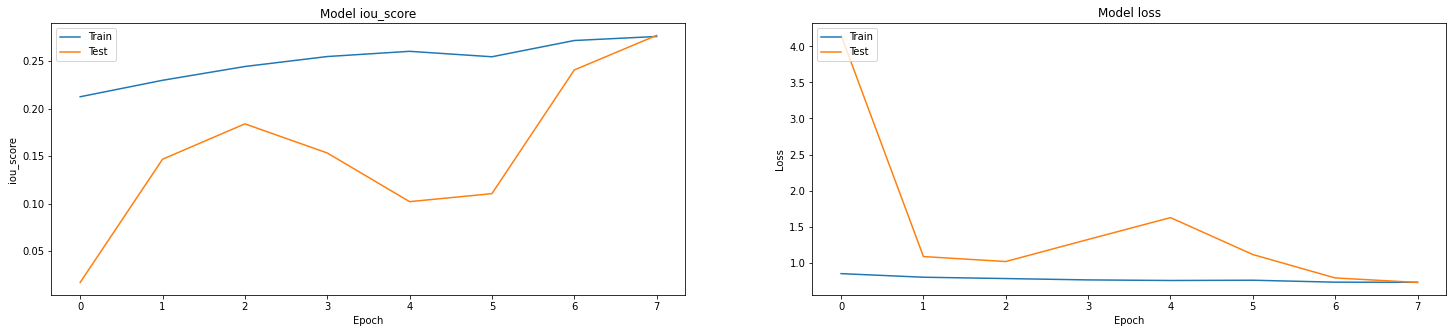

In [ ]:
# Plot training & validation iou_score values
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.show()

In [ ]:
images_ = test['image_path'].values
masks_ = test["mask_path"].values
lst = np.arange(len(images_))
len(lst)

1419

In [ ]:
np.random.choice(lst, size = 20, replace = False)

array([  71,  296,  454, 1212,  400, 1012,  225,  421, 1341,   93,  935,
        625,  820,  175,  690,  277,  684,    8,  833, 1117])

1/1 [==============================] - 0s 23ms/step


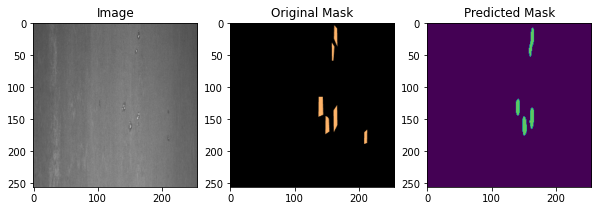

1/1 [==============================] - 0s 22ms/step


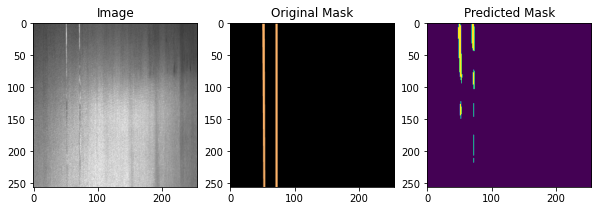

1/1 [==============================] - 0s 24ms/step


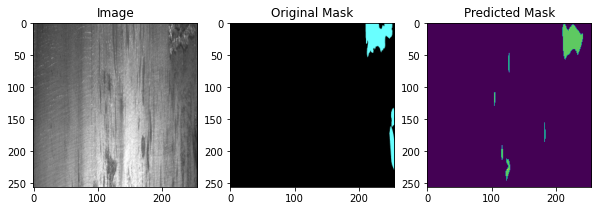

1/1 [==============================] - 0s 48ms/step


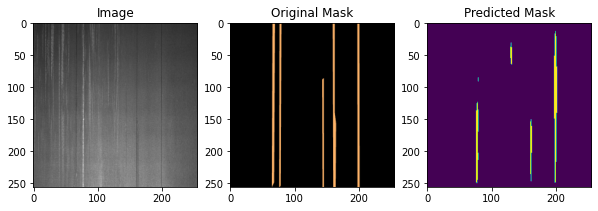

1/1 [==============================] - 0s 21ms/step


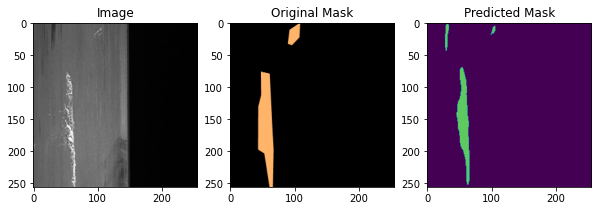

1/1 [==============================] - 0s 24ms/step


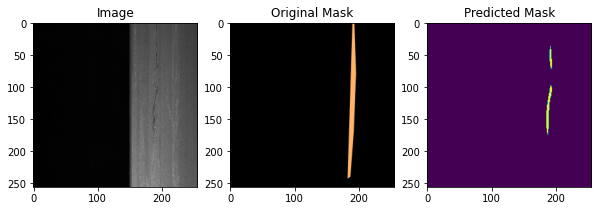

1/1 [==============================] - 0s 23ms/step


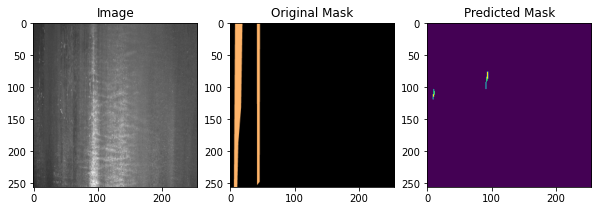

1/1 [==============================] - 0s 35ms/step


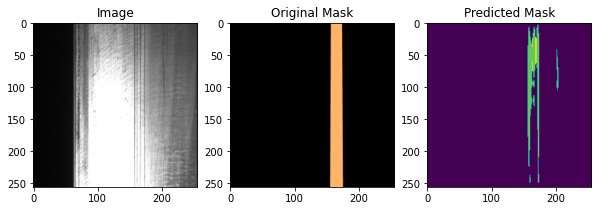

1/1 [==============================] - 0s 22ms/step


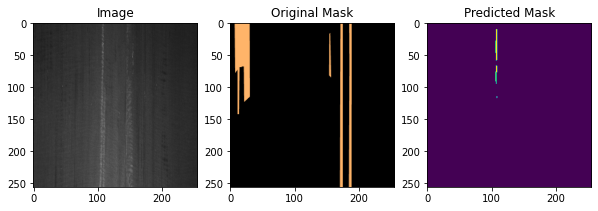

1/1 [==============================] - 0s 33ms/step


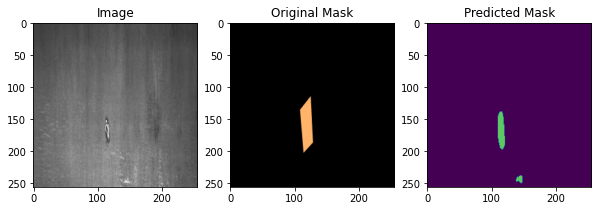

1/1 [==============================] - 0s 23ms/step


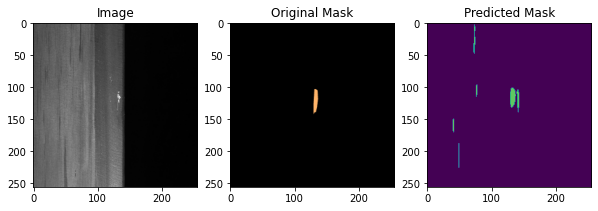

1/1 [==============================] - 0s 21ms/step


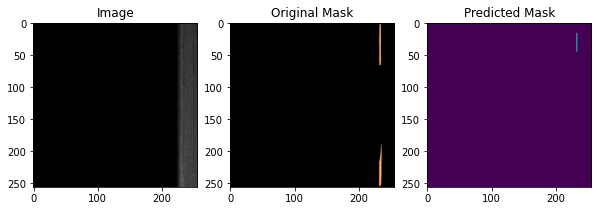

1/1 [==============================] - 0s 24ms/step


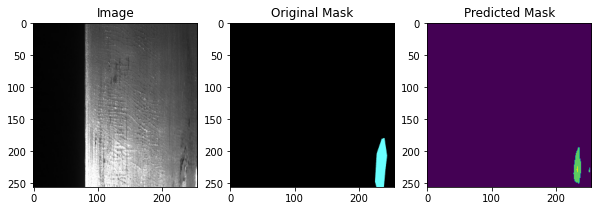

1/1 [==============================] - 0s 29ms/step


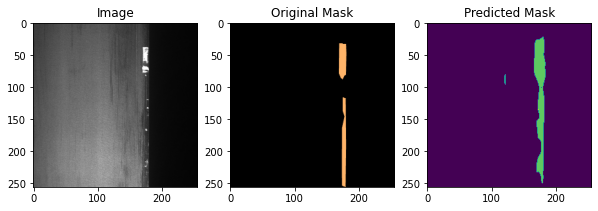

1/1 [==============================] - 0s 22ms/step


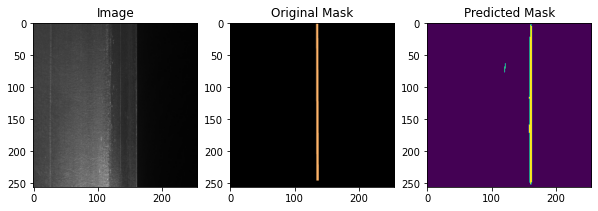

1/1 [==============================] - 0s 22ms/step


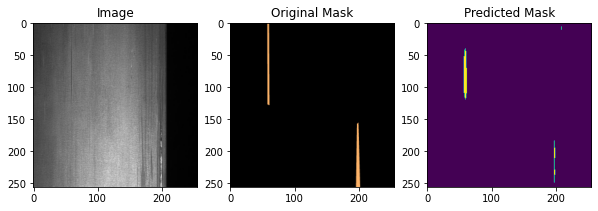

1/1 [==============================] - 0s 23ms/step


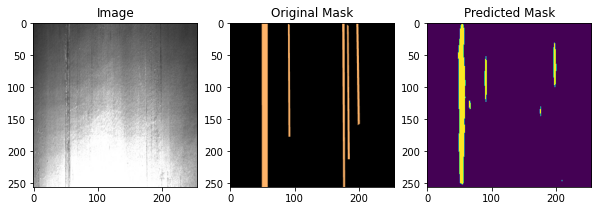

1/1 [==============================] - 0s 22ms/step


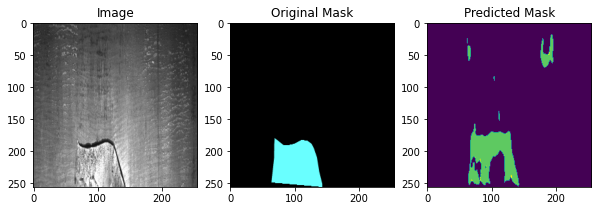

1/1 [==============================] - 0s 23ms/step


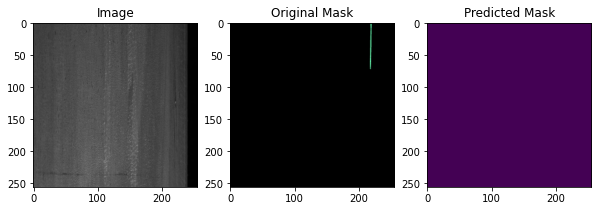

1/1 [==============================] - 0s 26ms/step


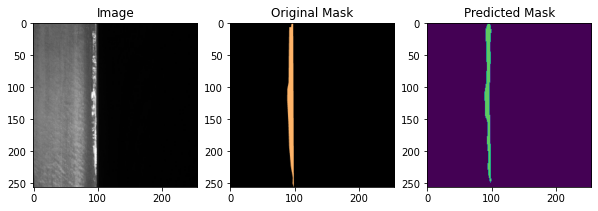

In [ ]:
# Visualizing the predicted mask for test data.
import random
ids = np.random.choice(lst, size = 20, replace = False)
for i in ids:
  image = cv2.imread(images_[i], cv2.IMREAD_UNCHANGED)
  image = cv2.resize(image, (256, 256),  interpolation = cv2.INTER_AREA)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = np.expand_dims(image, axis=0)

  mask  = cv2.imread(masks_[i], cv2.IMREAD_UNCHANGED)
  mask = cv2.resize(mask, (256, 256),  interpolation = cv2.INTER_AREA)

  pred = model.predict(image,verbose=1)
  pred = tf.argmax(pred, axis=-1)

  fig = plt.figure(figsize=(10,6))

  ax1 = fig.add_subplot(1, 3, 1)
  ax1.imshow(image[0,:,:])
  ax2=fig.add_subplot(1, 3, 2)
  ax2.imshow(mask)
  ax3=fig.add_subplot(1, 3, 3)
  ax3.imshow(pred[0,:,:])
  ax1.title.set_text('Image')
  ax2.title.set_text('Original Mask')
  ax3.title.set_text('Predicted Mask')
  plt.show()

In [ ]:
history = model.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=30,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/30
49/49 [==============================] - ETA: 0s - loss: 0.8418 - iou_score: 0.2096
Epoch 1: val_iou_score improved from -inf to 0.06799, saving model to ./best_model.h5
49/49 [==============================] - 200s 4s/step - loss: 0.8418 - iou_score: 0.2096 - val_loss: 1.6162 - val_iou_score: 0.0680 - lr: 0.0010
Epoch 2/30
49/49 [==============================] - ETA: 0s - loss: 0.6954 - iou_score: 0.3042
Epoch 2: val_iou_score improved from 0.06799 to 0.15711, saving model to ./best_model.h5
49/49 [==============================] - 168s 3s/step - loss: 0.6954 - iou_score: 0.3042 - val_loss: 1.0744 - val_iou_score: 0.1571 - lr: 0.0010
Epoch 3/30
49/49 [==============================] - ETA: 0s - loss: 0.6541 - iou_score: 0.3348
Epoch 3: val_iou_score improved from 0.15711 to 0.24199, saving model to ./best_model.h5
49/49 [==============================] - 167s 3s/step - loss: 0.6541 - iou_score: 0.3348 - val_loss: 0.8804 - val_iou_score: 0.2420 - lr: 0.0010
Epoch 4/30
49/49

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

## Visualizing result of Unet

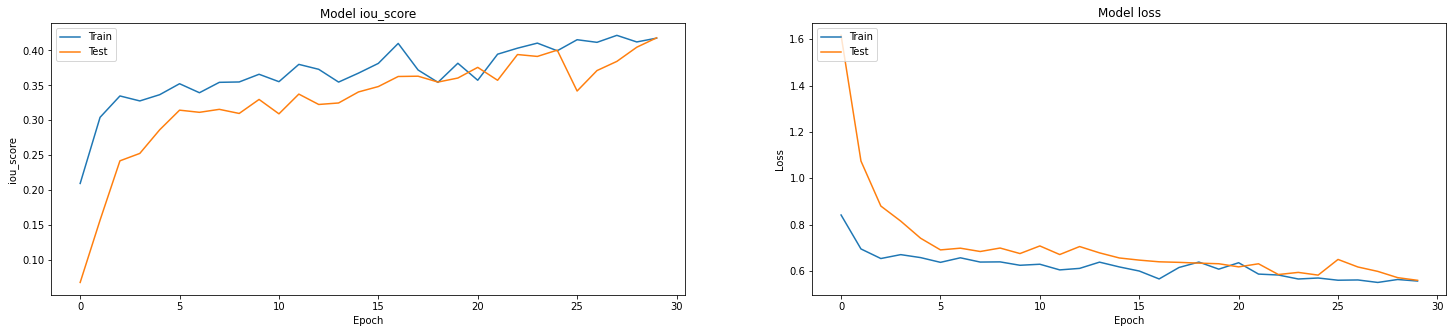

In [ ]:
# Plot training & validation iou_score values
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
images_ = validation['image_path'].values
masks_ = validation["mask_path"].values
lst = np.arange(len(images_))
len(lst)
np.random.choice(lst, size = 20, replace = False)

639

In [ ]:
np.random.choice(lst, size = 20, replace = False)

array([145,   6, 196, 365, 104, 405, 185, 336,  48, 366, 211,  78, 485,
       175, 245, 430, 557, 607, 530, 421])

1/1 [==============================] - 0s 25ms/step


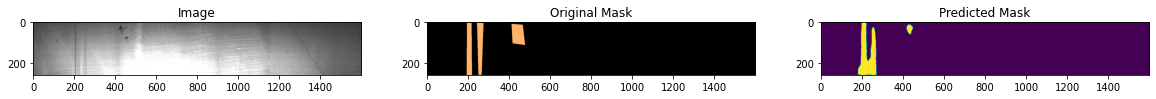

1/1 [==============================] - 0s 23ms/step


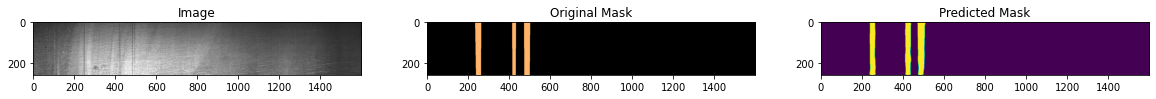

1/1 [==============================] - 0s 25ms/step


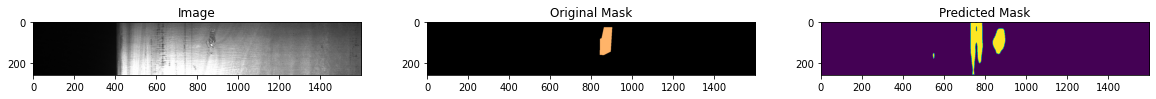

1/1 [==============================] - 0s 27ms/step


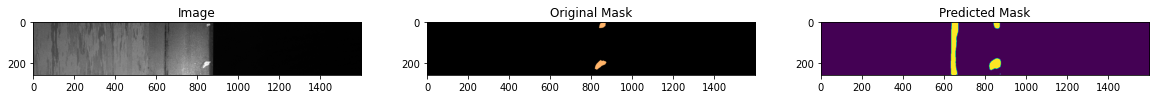

1/1 [==============================] - 0s 26ms/step


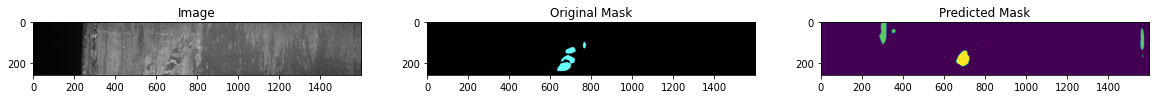

1/1 [==============================] - 0s 24ms/step


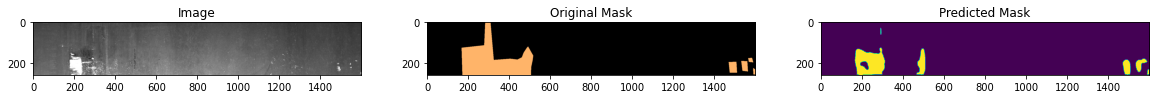

1/1 [==============================] - 0s 27ms/step


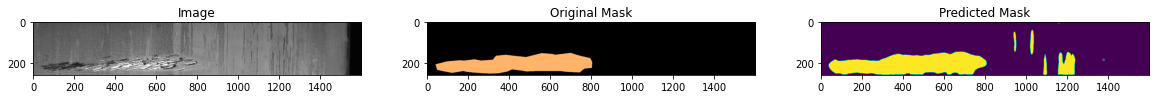

1/1 [==============================] - 0s 24ms/step


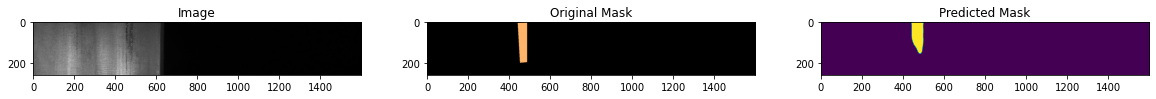

1/1 [==============================] - 0s 23ms/step


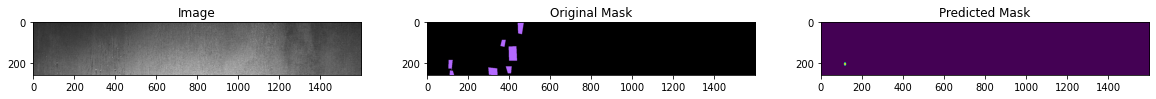

1/1 [==============================] - 0s 31ms/step


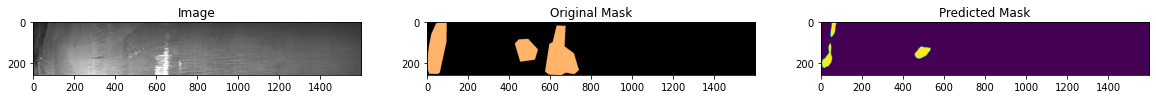

1/1 [==============================] - 0s 31ms/step


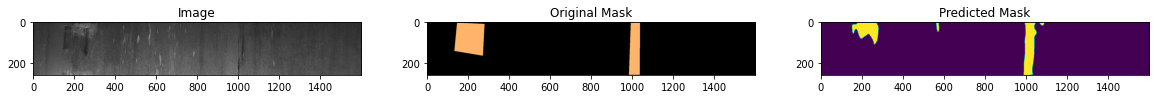

1/1 [==============================] - 0s 23ms/step


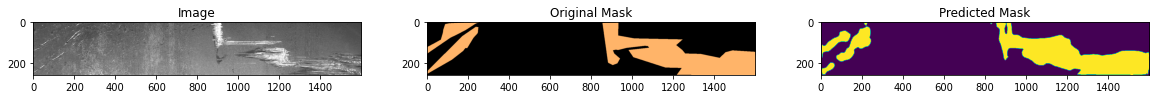

1/1 [==============================] - 0s 25ms/step


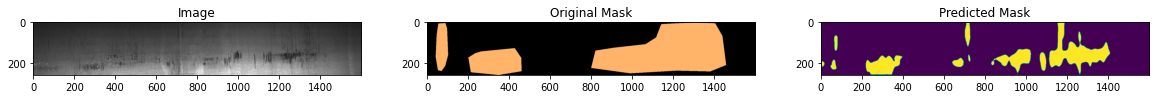

1/1 [==============================] - 0s 24ms/step


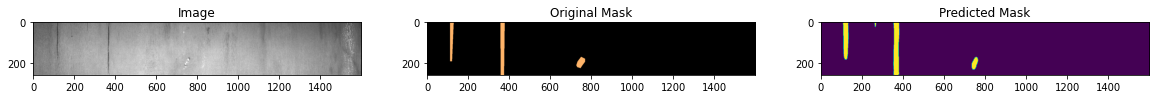

1/1 [==============================] - 0s 25ms/step


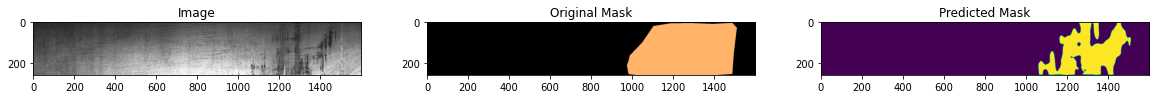

1/1 [==============================] - 0s 27ms/step


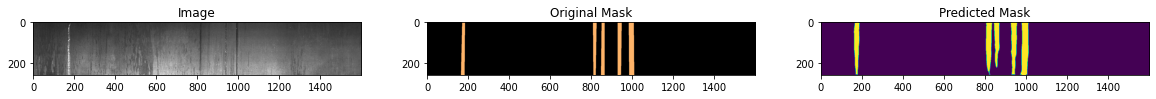

1/1 [==============================] - 0s 24ms/step


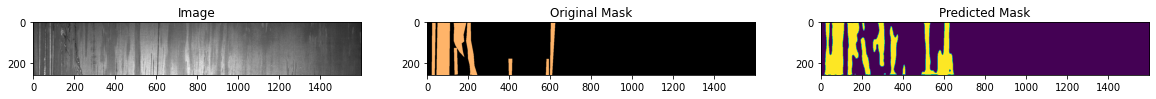

1/1 [==============================] - 0s 26ms/step


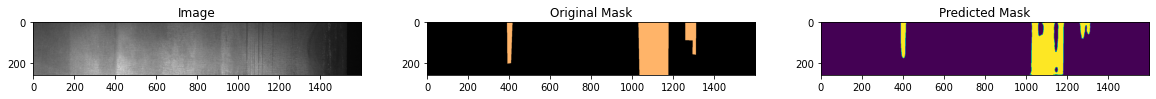

1/1 [==============================] - 0s 23ms/step


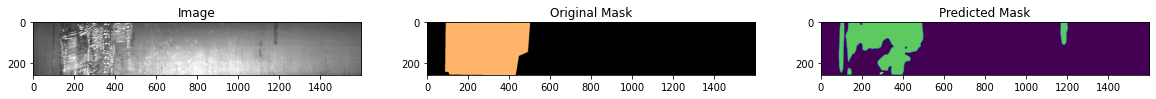

1/1 [==============================] - 0s 25ms/step


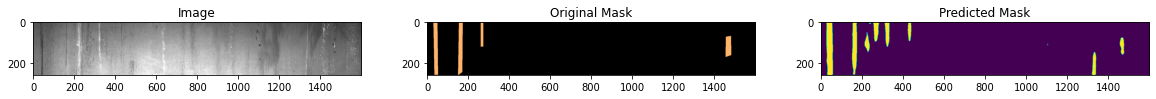

In [ ]:
# Visualizing the predicted mask for test data.
import random
ids = np.random.choice(lst, size = 20, replace = False)
for i in ids:
  image = cv2.imread(images_[i], cv2.IMREAD_UNCHANGED)
  # image = cv2.resize(image, (256, 256),  interpolation = cv2.INTER_AREA)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = np.expand_dims(image, axis=0)

  mask  = cv2.imread(masks_[i], cv2.IMREAD_UNCHANGED)
  # mask = cv2.resize(mask, (256, 256),  interpolation = cv2.INTER_AREA)

  pred = model.predict(image,verbose=1)
  pred = tf.argmax(pred, axis=-1)

  fig = plt.figure(figsize=(20,14))

  ax1 = fig.add_subplot(1, 3, 1)
  ax1.imshow(image[0,:,:])
  ax2=fig.add_subplot(1, 3, 2)
  ax2.imshow(mask)
  ax3=fig.add_subplot(1, 3, 3)
  ax3.imshow(pred[0,:,:])
  ax1.title.set_text('Image')
  ax2.title.set_text('Original Mask')
  ax3.title.set_text('Predicted Mask')
  plt.show()

In [ ]:
history = model.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=20,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/20
49/49 [==============================] - ETA: 0s - loss: 0.5503 - iou_score: 0.4203
Epoch 1: val_iou_score improved from 0.41797 to 0.42461, saving model to ./best_model.h5
49/49 [==============================] - 171s 4s/step - loss: 0.5503 - iou_score: 0.4203 - val_loss: 0.5477 - val_iou_score: 0.4246 - lr: 2.0000e-04
Epoch 2/20
49/49 [==============================] - ETA: 0s - loss: 0.5373 - iou_score: 0.4306
Epoch 2: val_iou_score improved from 0.42461 to 0.42679, saving model to ./best_model.h5
49/49 [==============================] - 170s 3s/step - loss: 0.5373 - iou_score: 0.4306 - val_loss: 0.5438 - val_iou_score: 0.4268 - lr: 2.0000e-04
Epoch 3/20
49/49 [==============================] - ETA: 0s - loss: 0.5467 - iou_score: 0.4232
Epoch 3: val_iou_score did not improve from 0.42679
49/49 [==============================] - 169s 3s/step - loss: 0.5467 - iou_score: 0.4232 - val_loss: 0.5491 - val_iou_score: 0.4216 - lr: 2.0000e-04
Epoch 4/20
49/49 [====================

### Visualizing the result of Unet

1/1 [==============================] - 0s 25ms/step


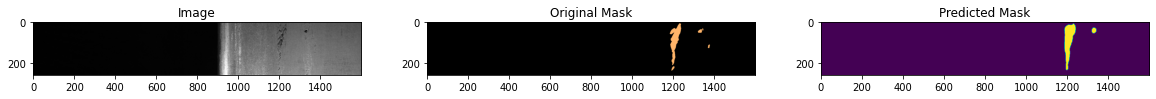

1/1 [==============================] - 0s 23ms/step


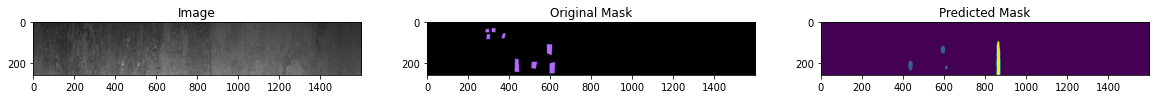

1/1 [==============================] - 0s 25ms/step


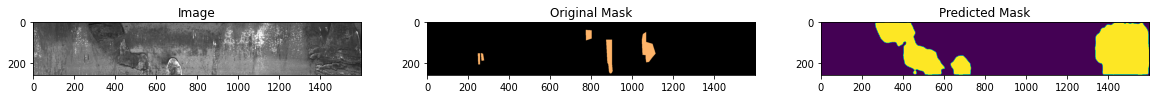

1/1 [==============================] - 0s 24ms/step


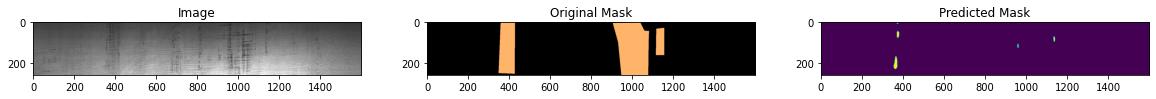

1/1 [==============================] - 0s 25ms/step


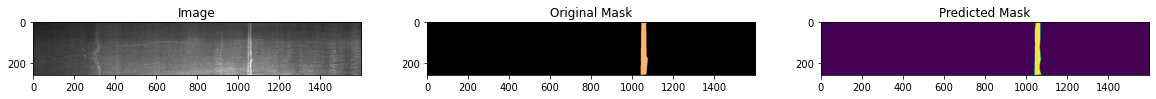

1/1 [==============================] - 0s 23ms/step


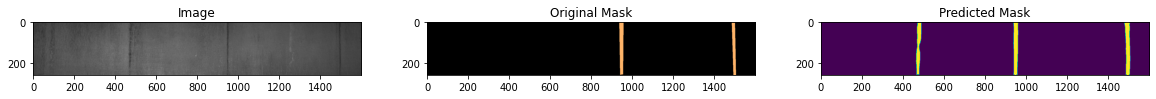

1/1 [==============================] - 0s 23ms/step


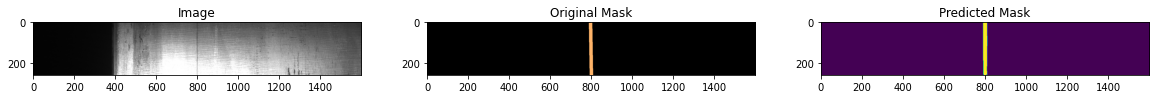

1/1 [==============================] - 0s 23ms/step


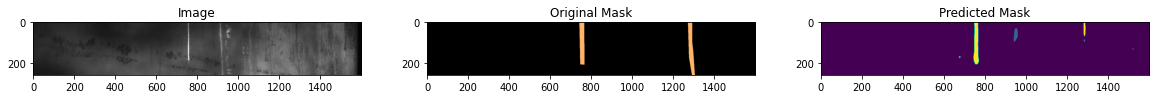

1/1 [==============================] - 0s 23ms/step


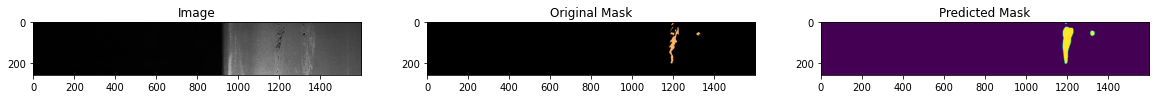

1/1 [==============================] - 0s 25ms/step


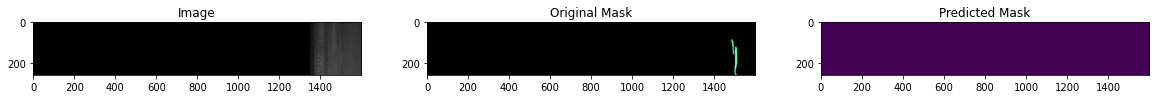

1/1 [==============================] - 0s 30ms/step


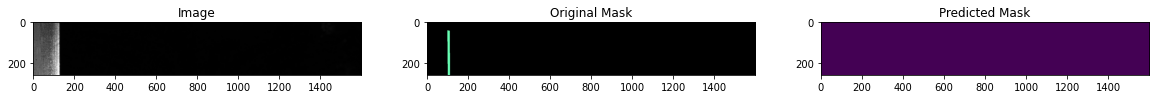

1/1 [==============================] - 0s 24ms/step


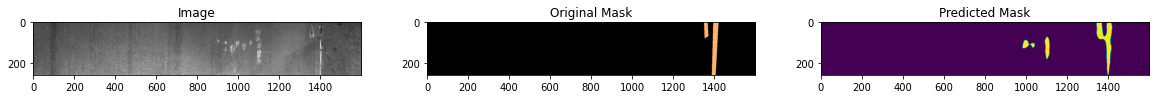

1/1 [==============================] - 0s 24ms/step


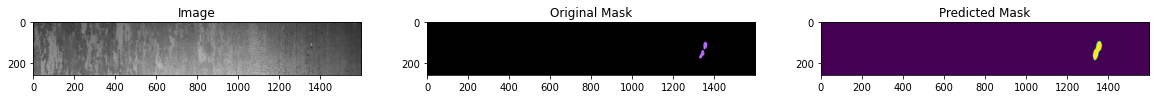

1/1 [==============================] - 0s 24ms/step


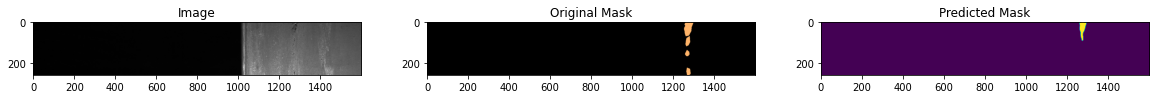

1/1 [==============================] - 0s 26ms/step


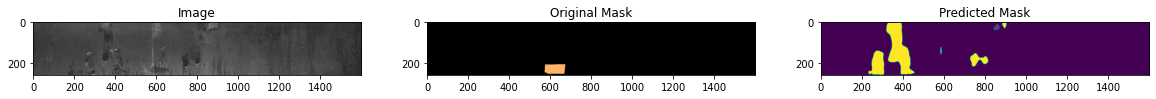

1/1 [==============================] - 0s 26ms/step


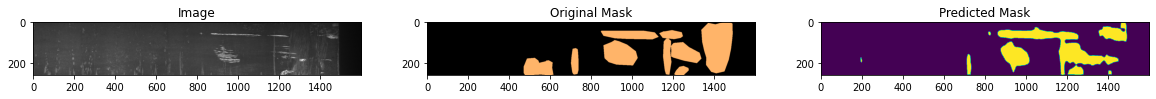

1/1 [==============================] - 0s 23ms/step


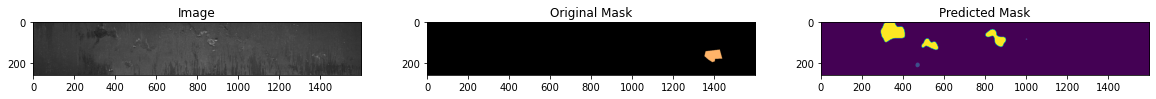

1/1 [==============================] - 0s 23ms/step


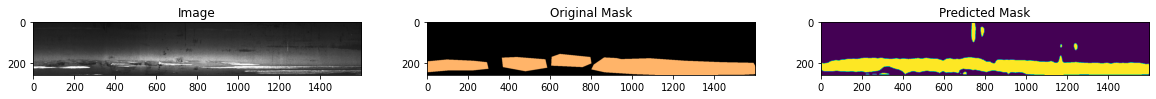

1/1 [==============================] - 0s 23ms/step


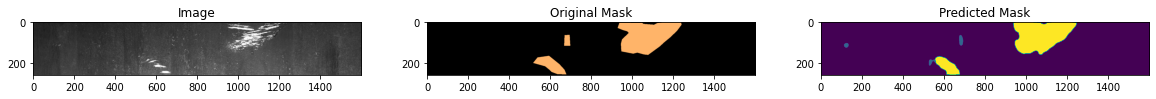

1/1 [==============================] - 0s 23ms/step


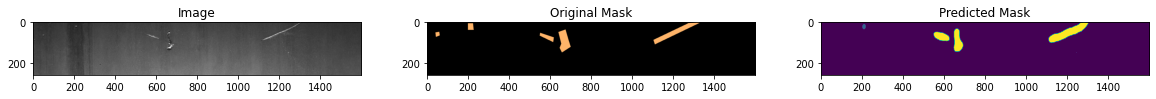

In [ ]:
# Visualizing the predicted mask for test data.
import random
ids = np.random.choice(lst, size = 20, replace = False)
for i in ids:
  image = cv2.imread(images_[i], cv2.IMREAD_UNCHANGED)
  # image = cv2.resize(image, (256, 256),  interpolation = cv2.INTER_AREA)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = np.expand_dims(image, axis=0)

  mask  = cv2.imread(masks_[i], cv2.IMREAD_UNCHANGED)
  # mask = cv2.resize(mask, (256, 256),  interpolation = cv2.INTER_AREA)

  pred = model.predict(image,verbose=1)
  pred = tf.argmax(pred, axis=-1)

  fig = plt.figure(figsize=(20,14))

  ax1 = fig.add_subplot(1, 3, 1)
  ax1.imshow(image[0,:,:])
  ax2=fig.add_subplot(1, 3, 2)
  ax2.imshow(mask)
  ax3=fig.add_subplot(1, 3, 3)
  ax3.imshow(pred[0,:,:])
  ax1.title.set_text('Image')
  ax2.title.set_text('Original Mask')
  ax3.title.set_text('Predicted Mask')
  plt.show()

In [ ]:
history = model.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=20,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/20
49/49 [==============================] - ETA: 0s - loss: 0.5298 - iou_score: 0.4455
Epoch 1: val_iou_score did not improve from 0.44580
49/49 [==============================] - 212s 4s/step - loss: 0.5298 - iou_score: 0.4455 - val_loss: 0.5265 - val_iou_score: 0.4425 - lr: 1.0000e-04
Epoch 2/20
49/49 [==============================] - ETA: 0s - loss: 0.5190 - iou_score: 0.4489
Epoch 2: val_iou_score did not improve from 0.44580
49/49 [==============================] - 167s 3s/step - loss: 0.5190 - iou_score: 0.4489 - val_loss: 0.5284 - val_iou_score: 0.4393 - lr: 1.0000e-04
Epoch 3/20
49/49 [==============================] - ETA: 0s - loss: 0.5291 - iou_score: 0.4344
Epoch 3: val_iou_score did not improve from 0.44580
49/49 [==============================] - 167s 3s/step - loss: 0.5291 - iou_score: 0.4344 - val_loss: 0.5244 - val_iou_score: 0.4428 - lr: 1.0000e-04
Epoch 4/20
49/49 [==============================] - ETA: 0s - loss: 0.5149 - iou_score: 0.4511
Epoch 4: val_iou_

### Visualizing the result of Unet

1/1 [==============================] - 0s 208ms/step


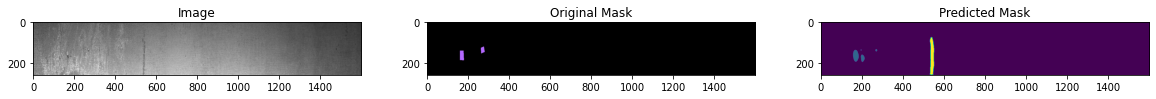

1/1 [==============================] - 0s 23ms/step


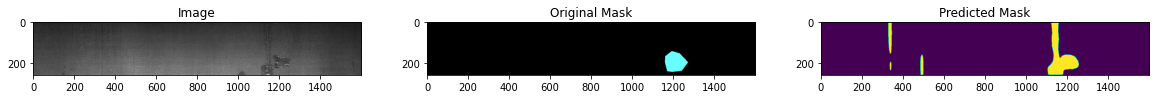

1/1 [==============================] - 0s 28ms/step


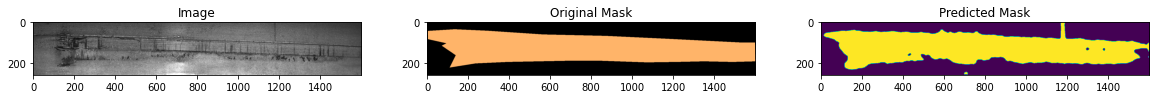

1/1 [==============================] - 0s 24ms/step


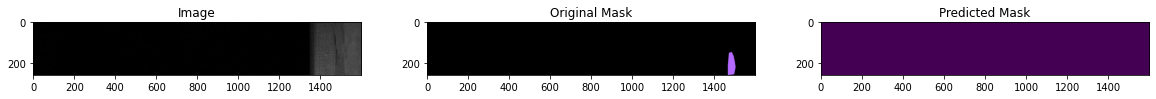

1/1 [==============================] - 0s 23ms/step


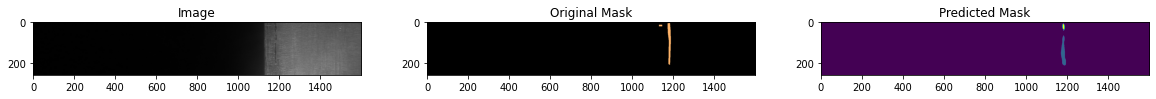

1/1 [==============================] - 0s 23ms/step


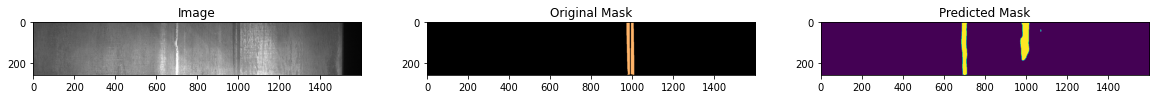

1/1 [==============================] - 0s 32ms/step


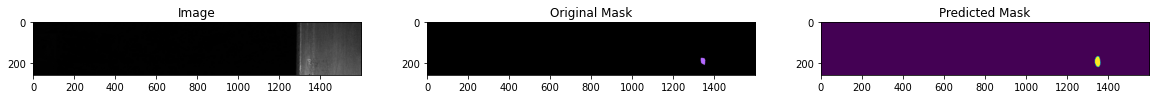

1/1 [==============================] - 0s 29ms/step


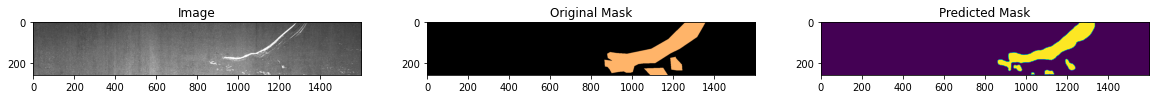

1/1 [==============================] - 0s 23ms/step


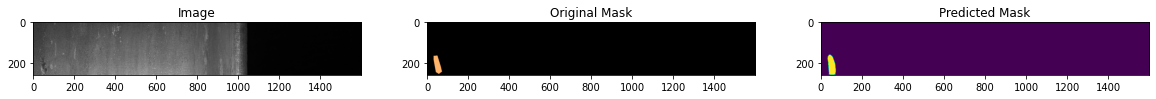

1/1 [==============================] - 0s 24ms/step


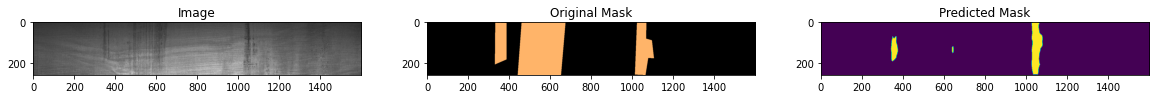

1/1 [==============================] - 0s 22ms/step


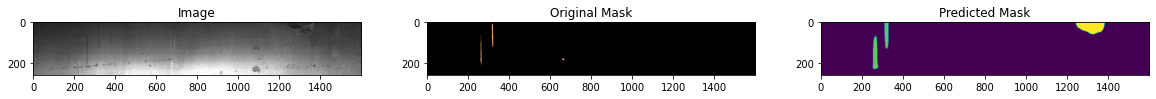

1/1 [==============================] - 0s 24ms/step


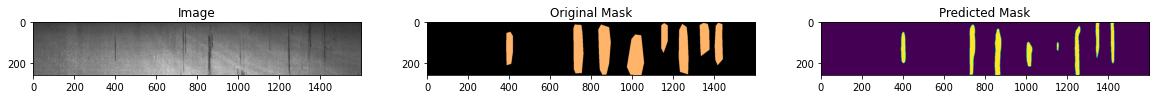

1/1 [==============================] - 0s 23ms/step


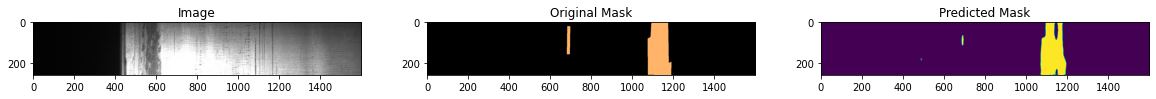

1/1 [==============================] - 0s 26ms/step


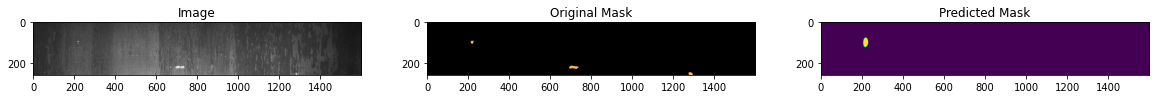

1/1 [==============================] - 0s 24ms/step


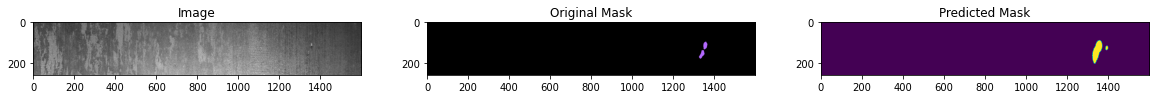

1/1 [==============================] - 0s 24ms/step


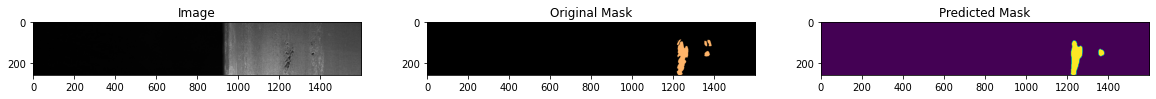

1/1 [==============================] - 0s 25ms/step


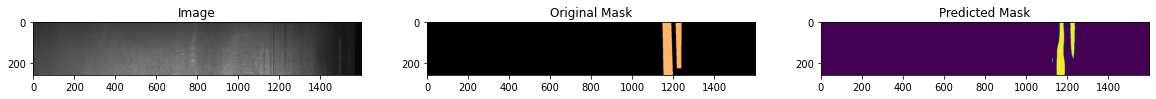

1/1 [==============================] - 0s 24ms/step


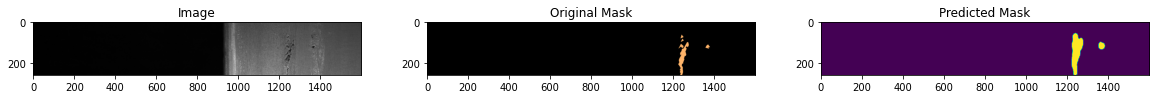

1/1 [==============================] - 0s 23ms/step


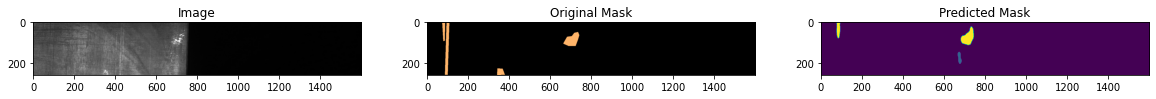

1/1 [==============================] - 0s 25ms/step


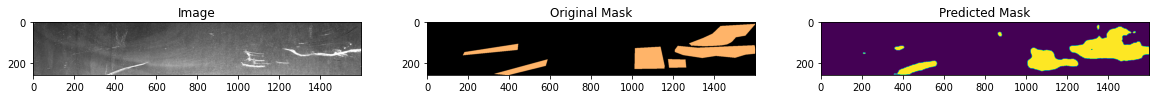

In [ ]:
# Visualizing the predicted mask for test data.
import random
ids = np.random.choice(lst, size = 20, replace = False)
for i in ids:
  image = cv2.imread(images_[i], cv2.IMREAD_UNCHANGED)
  # image = cv2.resize(image, (256, 256),  interpolation = cv2.INTER_AREA)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = np.expand_dims(image, axis=0)

  mask  = cv2.imread(masks_[i], cv2.IMREAD_UNCHANGED)
  # mask = cv2.resize(mask, (256, 256),  interpolation = cv2.INTER_AREA)

  pred = model.predict(image,verbose=1)
  pred = tf.argmax(pred, axis=-1)

  fig = plt.figure(figsize=(20,14))

  ax1 = fig.add_subplot(1, 3, 1)
  ax1.imshow(image[0,:,:])
  ax2=fig.add_subplot(1, 3, 2)
  ax2.imshow(mask)
  ax3=fig.add_subplot(1, 3, 3)
  ax3.imshow(pred[0,:,:])
  ax1.title.set_text('Image')
  ax2.title.set_text('Original Mask')
  ax3.title.set_text('Predicted Mask')
  plt.show()

# **4.5 Applying VGG16**

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, BatchNormalization, Dropout, Input, MaxPool2D , Flatten


tf.keras.backend.clear_session()
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models.metrics import iou_score
sm.set_framework('tf.keras')


Segmentation Models: using `keras` framework.


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
model = VGG16(input_shape=[256, 1600, 3], weights='imagenet', include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 1600, 3)]    0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 1600, 64)     1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 1600, 64)     36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 800, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 800, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 800, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 400, 128)      0     

In [ ]:
# for layer in model.layers:
#   layer.trainable = True
# input1 = model.output
# conv1 = Conv2D(filters=512, kernel_size=(4,4), padding="same", activation="softmax")(input1)
# con2d_tr1 = Conv2DTranspose(5, (2, 2), strides=2, padding="same")(conv1)
# con2d_tr2 = Conv2DTranspose(5, (2, 2), strides=16, padding="same")(con2d_tr1)
# model1 = Model(inputs = model.input, outputs = con2d_tr2)
# model1.summary()

In [ ]:
for layer in model.layers:
  layer.trainable = False
input1 = model.output
u1 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (input1)
c1 = Conv2D(64, (3, 3), activation='elu', padding='same') (u1)
c1 = Conv2D(64, (3, 3), activation='elu', padding='same') (c1)

u2 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c1)
c2 = Conv2D(32, (3, 3), activation='elu', padding='same') (u2)
c2 = Conv2D(32, (3, 3), activation='elu', padding='same') (c2)

u3 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c2)
c3 = Conv2D(32, (3, 3), activation='elu', padding='same') (u3)
c3 = Conv2D(32, (3, 3), activation='elu', padding='same') (c3)

u4 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c3)
c4 = Conv2D(16, (3, 3), activation='elu', padding='same') (u4)
c4 = Conv2D(16, (3, 3), activation='elu', padding='same') (c4)

u5 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c4)
c5 = Conv2D(8, (3, 3), activation='elu', padding='same') (u5)
c5 = Conv2D(8, (3, 3), activation='elu', padding='same') (c5)

outputs = Conv2D(5, (1, 1), activation='softmax') (c5)

model1 = Model(inputs=model.input, outputs=[outputs])
# adam = Adam(learning_rate=0.001)
# model.compile(optimizer=adam, loss=bce_dice_loss, metrics=[dice_coef])

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 1600, 3)]    0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 1600, 64)     1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 1600, 64)     36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 800, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 800, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 800, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 400, 128)      0     

In [ ]:
BATCH_SIZE=16
train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = Dataloder(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

assert train_dataloader[0][0].shape == (BATCH_SIZE, 256, 1600, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, 256, 1600, 5)

print(train_dataloader[0][0].shape)
print(train_dataloader[0][1].shape)
print(len(train_dataloader))
print(len(test_dataloader))
type(train_dataset[0])

(16, 256, 1600, 3)
(16, 256, 1600, 5)
310
93


tuple

In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks
optim = tf.keras.optimizers.Adam(learning_rate= 0.0009)
focal_loss = sm.losses.cce_dice_loss
model1.compile(optim, focal_loss, metrics=[iou_score])
callbacks = [callbacks.ModelCheckpoint('./best_model.h5', save_weights_only = True, save_best_only = True, \
                                       mode = 'max', monitor = 'val_iou_score', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor = 'val_iou_score', patience = 3, mode = 'max', verbose = 1,min_lr=0.0001)
]

In [ ]:
history = model1.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=3,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/3
19/19 [==============================] - ETA: 0s - loss: 1.0917 - iou_score: 0.0965
Epoch 1: val_iou_score improved from -inf to 0.18266, saving model to ./best_model.h5
19/19 [==============================] - 118s 6s/step - loss: 1.0917 - iou_score: 0.0965 - val_loss: 0.8787 - val_iou_score: 0.1827 - lr: 9.0000e-04
Epoch 2/3
19/19 [==============================] - ETA: 0s - loss: 0.8165 - iou_score: 0.2218
Epoch 2: val_iou_score improved from 0.18266 to 0.23409, saving model to ./best_model.h5
19/19 [==============================] - 115s 6s/step - loss: 0.8165 - iou_score: 0.2218 - val_loss: 0.7964 - val_iou_score: 0.2341 - lr: 9.0000e-04
Epoch 3/3
19/19 [==============================] - ETA: 0s - loss: 0.7801 - iou_score: 0.2389
Epoch 3: val_iou_score improved from 0.23409 to 0.25021, saving model to ./best_model.h5
19/19 [==============================] - 114s 6s/step - loss: 0.7801 - iou_score: 0.2389 - val_loss: 0.7779 - val_iou_score: 0.2502 - lr: 9.0000e-04


In [ ]:
history = model1.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=10,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 0.7582 - iou_score: 0.2633
Epoch 1: val_iou_score improved from 0.25021 to 0.27136, saving model to ./best_model.h5
19/19 [==============================] - 115s 6s/step - loss: 0.7582 - iou_score: 0.2633 - val_loss: 0.7421 - val_iou_score: 0.2714 - lr: 9.0000e-04
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.7549 - iou_score: 0.2607
Epoch 2: val_iou_score improved from 0.27136 to 0.27514, saving model to ./best_model.h5
19/19 [==============================] - 114s 6s/step - loss: 0.7549 - iou_score: 0.2607 - val_loss: 0.7384 - val_iou_score: 0.2751 - lr: 9.0000e-04
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.7355 - iou_score: 0.2701
Epoch 3: val_iou_score did not improve from 0.27514
19/19 [==============================] - 112s 6s/step - loss: 0.7355 - iou_score: 0.2701 - val_loss: 0.7291 - val_iou_score: 0.2737 - lr: 9.0000e-04
Epoch 4/10
19/19 [====================

In [ ]:
# del model1

In [ ]:
history = model1.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=10,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 0.6358 - iou_score: 0.3519
Epoch 1: val_iou_score improved from 0.33789 to 0.34003, saving model to ./best_model.h5
19/19 [==============================] - 115s 6s/step - loss: 0.6358 - iou_score: 0.3519 - val_loss: 0.6539 - val_iou_score: 0.3400 - lr: 9.0000e-04
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.6575 - iou_score: 0.3333
Epoch 2: val_iou_score improved from 0.34003 to 0.34605, saving model to ./best_model.h5
19/19 [==============================] - 114s 6s/step - loss: 0.6575 - iou_score: 0.3333 - val_loss: 0.6448 - val_iou_score: 0.3460 - lr: 9.0000e-04
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.6476 - iou_score: 0.3445
Epoch 3: val_iou_score improved from 0.34605 to 0.35284, saving model to ./best_model.h5
19/19 [==============================] - 111s 6s/step - loss: 0.6476 - iou_score: 0.3445 - val_loss: 0.6381 - val_iou_score: 0.3528 - lr: 9.0000e-04
E

In [ ]:
history = model1.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=10,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 0.6460 - iou_score: 0.3476
Epoch 1: val_iou_score did not improve from 0.35784
19/19 [==============================] - 114s 6s/step - loss: 0.6460 - iou_score: 0.3476 - val_loss: 0.6424 - val_iou_score: 0.3387 - lr: 9.0000e-04
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.6119 - iou_score: 0.3673
Epoch 2: val_iou_score improved from 0.35784 to 0.35855, saving model to ./best_model.h5
19/19 [==============================] - 112s 6s/step - loss: 0.6119 - iou_score: 0.3673 - val_loss: 0.6281 - val_iou_score: 0.3586 - lr: 9.0000e-04
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.6032 - iou_score: 0.3742
Epoch 3: val_iou_score did not improve from 0.35855
19/19 [==============================] - 113s 6s/step - loss: 0.6032 - iou_score: 0.3742 - val_loss: 0.6259 - val_iou_score: 0.3581 - lr: 9.0000e-04
Epoch 4/10
19/19 [==============================] - ETA: 0s - loss: 0.6024 

In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
focal_loss = sm.losses.cce_dice_loss
model1.compile(optim, focal_loss, metrics=[iou_score])
callbacks = [callbacks.ModelCheckpoint('./best_model.h5', save_weights_only = True, save_best_only = True, \
                                       mode = 'max', monitor = 'val_iou_score', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor = 'val_iou_score', patience = 3, mode = 'max', verbose = 1,min_lr=0.0001)
]

In [ ]:
model1.load_weights("/content/best_model.h5")

In [ ]:
history = model1.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=5,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/5
19/19 [==============================] - ETA: 0s - loss: 0.6312 - iou_score: 0.3596
Epoch 1: val_iou_score improved from -inf to 0.36423, saving model to ./best_model.h5
19/19 [==============================] - 166s 9s/step - loss: 0.6312 - iou_score: 0.3596 - val_loss: 0.6252 - val_iou_score: 0.3642 - lr: 0.0010
Epoch 2/5
19/19 [==============================] - ETA: 0s - loss: 0.6125 - iou_score: 0.3704
Epoch 2: val_iou_score improved from 0.36423 to 0.36843, saving model to ./best_model.h5
19/19 [==============================] - 110s 6s/step - loss: 0.6125 - iou_score: 0.3704 - val_loss: 0.6094 - val_iou_score: 0.3684 - lr: 0.0010
Epoch 3/5
19/19 [==============================] - ETA: 0s - loss: 0.6013 - iou_score: 0.3747
Epoch 3: val_iou_score improved from 0.36843 to 0.37341, saving model to ./best_model.h5
19/19 [==============================] - 163s 9s/step - loss: 0.6013 - iou_score: 0.3747 - val_loss: 0.6035 - val_iou_score: 0.3734 - lr: 0.0010
Epoch 4/5
19/19 [==

In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
focal_loss = sm.losses.cce_dice_loss
model1.compile(optim, focal_loss, metrics=["accuracy"])
callbacks = [callbacks.ModelCheckpoint('./best_model.h5', save_weights_only = True, save_best_only = True, \
                                       mode = 'max', monitor = 'val_iou_score', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor = 'val_iou_score', patience = 3, mode = 'max', verbose = 1,min_lr=0.0001)
]

In [ ]:
model1.load_weights("/content/best_model.h5")

In [ ]:
history = model1.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=5,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/5
19/19 [==============================] - ETA: 0s - loss: 0.6178 - accuracy: 0.9540

19/19 [==============================] - 112s 6s/step - loss: 0.6178 - accuracy: 0.9540 - val_loss: 0.6120 - val_accuracy: 0.9522 - lr: 0.0010
Epoch 2/5
19/19 [==============================] - ETA: 0s - loss: 0.6126 - accuracy: 0.9537

19/19 [==============================] - 107s 6s/step - loss: 0.6126 - accuracy: 0.9537 - val_loss: 0.6181 - val_accuracy: 0.9488 - lr: 0.0010
Epoch 3/5
19/19 [==============================] - ETA: 0s - loss: 0.6102 - accuracy: 0.9541

19/19 [==============================] - 110s 6s/step - loss: 0.6102 - accuracy: 0.9541 - val_loss: 0.6052 - val_accuracy: 0.9515 - lr: 0.0010
Epoch 4/5
19/19 [==============================] - ETA: 0s - loss: 0.5801 - accuracy: 0.9508

19/19 [==============================] - 112s 6s/step - loss: 0.5801 - accuracy: 0.9508 - val_loss: 0.6303 - val_accuracy: 0.9564 - lr: 0.0010
Epoch 5/5
19/19 [==============================] - ETA: 0s - loss: 0.6295 - accuracy: 0.9535

19/19 [==============================] - 113s 6s/step - loss: 0.6295 - accuracy: 0.9535 - val_loss: 0.6086 - val_accuracy: 0.9518 - lr: 0.0010


In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
focal_loss = sm.losses.cce_dice_loss
model1.compile(optim, focal_loss, metrics=[iou_score, "accuracy"])
callbacks = [callbacks.ModelCheckpoint('./best_model.h5', save_weights_only = True, save_best_only = True, \
                                       mode = 'max', monitor = 'val_iou_score', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor = 'val_iou_score', patience = 3, mode = 'max', verbose = 1,min_lr=0.0001)
]

In [ ]:
model1.load_weights("/content/best_model.h5")

In [ ]:
history = model1.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=10,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 0.6376 - iou_score: 0.3512 - accuracy: 0.9494
Epoch 1: val_iou_score improved from -inf to 0.37633, saving model to ./best_model.h5
19/19 [==============================] - 116s 6s/step - loss: 0.6376 - iou_score: 0.3512 - accuracy: 0.9494 - val_loss: 0.6135 - val_iou_score: 0.3763 - val_accuracy: 0.9492 - lr: 0.0010
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.6119 - iou_score: 0.3673 - accuracy: 0.9545
Epoch 2: val_iou_score did not improve from 0.37633
19/19 [==============================] - 109s 6s/step - loss: 0.6119 - iou_score: 0.3673 - accuracy: 0.9545 - val_loss: 0.6221 - val_iou_score: 0.3552 - val_accuracy: 0.9469 - lr: 0.0010
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.6112 - iou_score: 0.3704 - accuracy: 0.9502
Epoch 3: val_iou_score did not improve from 0.37633
19/19 [==============================] - 113s 6s/step - loss: 0.6112 - iou_score: 0.3704 - acc

In [ ]:
history = model1.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=10,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 0.5861 - iou_score: 0.3816 - accuracy: 0.9563
Epoch 1: val_iou_score did not improve from 0.38409
19/19 [==============================] - 117s 6s/step - loss: 0.5861 - iou_score: 0.3816 - accuracy: 0.9563 - val_loss: 0.5880 - val_iou_score: 0.3831 - val_accuracy: 0.9536 - lr: 1.0000e-04
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.5766 - iou_score: 0.3921 - accuracy: 0.9545
Epoch 2: val_iou_score did not improve from 0.38409
19/19 [==============================] - 110s 6s/step - loss: 0.5766 - iou_score: 0.3921 - accuracy: 0.9545 - val_loss: 0.5946 - val_iou_score: 0.3780 - val_accuracy: 0.9539 - lr: 1.0000e-04
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.5921 - iou_score: 0.3762 - accuracy: 0.9552
Epoch 3: val_iou_score did not improve from 0.38409
19/19 [==============================] - 112s 6s/step - loss: 0.5921 - iou_score: 0.3762 - accuracy: 0.9552 - val_loss: 

In [ ]:
history = model1.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=10,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 0.5969 - iou_score: 0.3787 - accuracy: 0.9544
Epoch 1: val_iou_score improved from 0.38706 to 0.38755, saving model to ./best_model.h5
19/19 [==============================] - 112s 6s/step - loss: 0.5969 - iou_score: 0.3787 - accuracy: 0.9544 - val_loss: 0.5818 - val_iou_score: 0.3876 - val_accuracy: 0.9550 - lr: 1.0000e-04
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.5745 - iou_score: 0.3912 - accuracy: 0.9537
Epoch 2: val_iou_score did not improve from 0.38755
19/19 [==============================] - 112s 6s/step - loss: 0.5745 - iou_score: 0.3912 - accuracy: 0.9537 - val_loss: 0.5868 - val_iou_score: 0.3855 - val_accuracy: 0.9546 - lr: 1.0000e-04
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.5860 - iou_score: 0.3863 - accuracy: 0.9541
Epoch 3: val_iou_score did not improve from 0.38755
19/19 [==============================] - 112s 6s/step - loss: 0.5860 - iou_score: 0

In [ ]:
model1.load_weights("/content/drive/MyDrive/Case Study-2/best_model_vgg16_18-12-22.h5")

### 4.6 Visualizing the result of VGG16

In [ ]:
images_ = validation['image_path'].values
masks_ = validation["mask_path"].values
lst = np.arange(len(images_))
len(lst)
np.random.choice(lst, size = 20, replace = False)

array([ 97, 167, 321,  92, 376, 380, 252,  75, 455,  58,  29, 312, 557,
       149, 600, 407, 605, 546, 354, 400])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 19ms/step


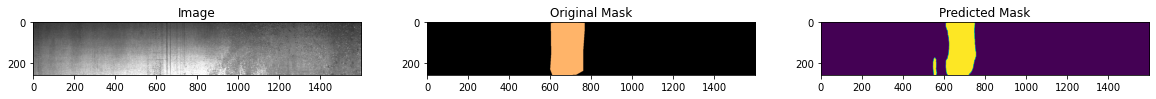

1/1 [==============================] - 0s 17ms/step


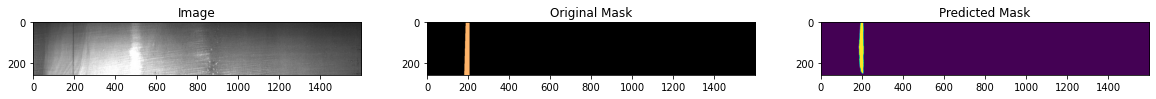

1/1 [==============================] - 0s 17ms/step


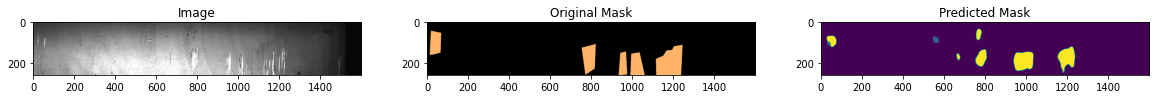

1/1 [==============================] - 0s 18ms/step


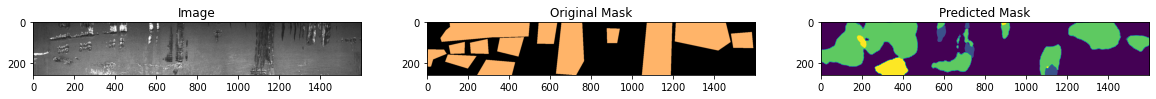

1/1 [==============================] - 0s 17ms/step


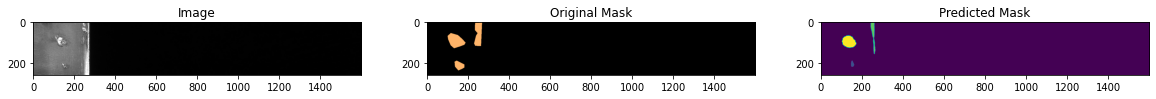

1/1 [==============================] - 0s 18ms/step


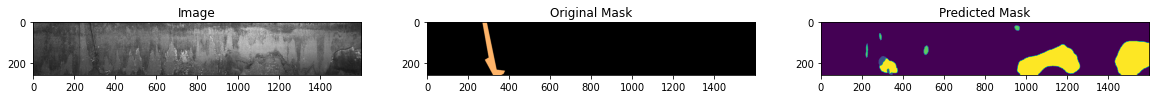

1/1 [==============================] - 0s 18ms/step


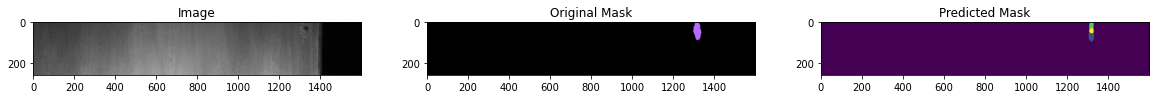

1/1 [==============================] - 0s 17ms/step


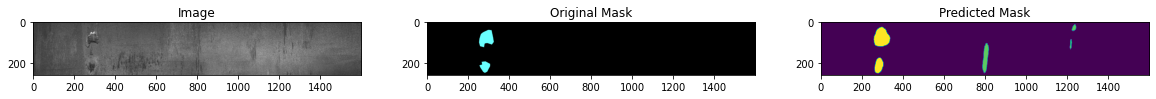

1/1 [==============================] - 0s 19ms/step


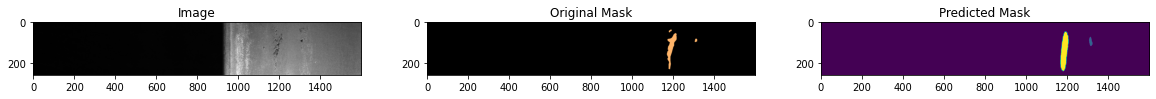

1/1 [==============================] - 0s 25ms/step


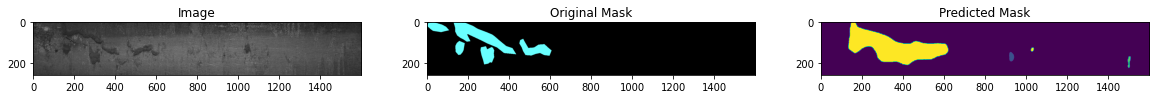

1/1 [==============================] - 0s 18ms/step


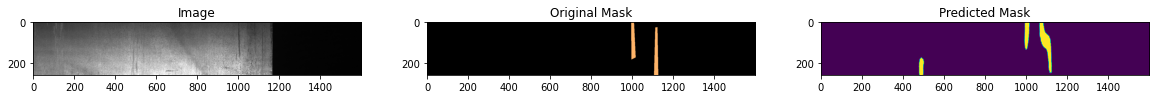

1/1 [==============================] - 0s 17ms/step


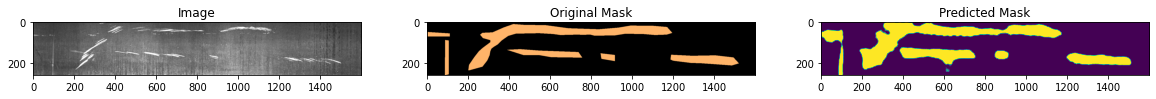

1/1 [==============================] - 0s 19ms/step


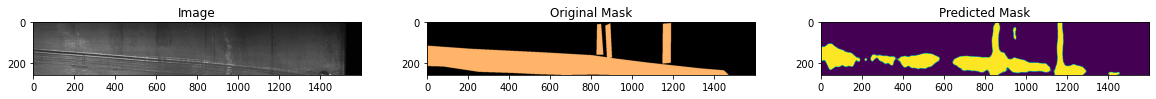

1/1 [==============================] - 0s 19ms/step


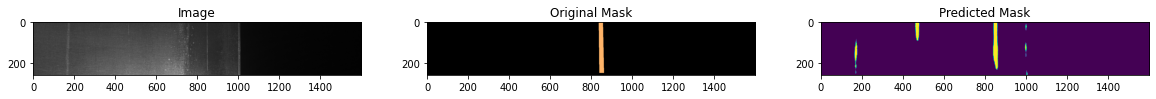

1/1 [==============================] - 0s 20ms/step


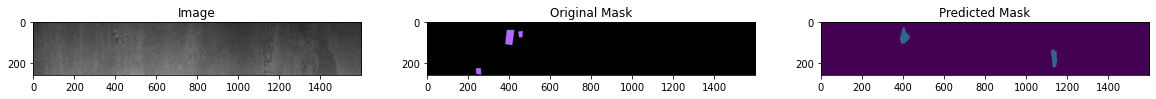

1/1 [==============================] - 0s 18ms/step


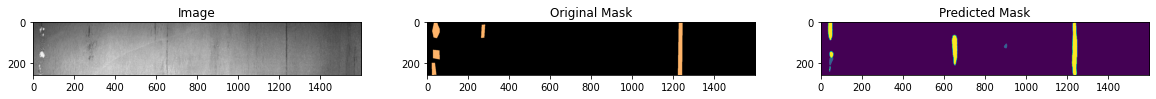

1/1 [==============================] - 0s 17ms/step


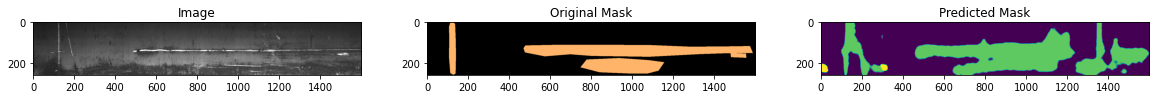

1/1 [==============================] - 0s 17ms/step


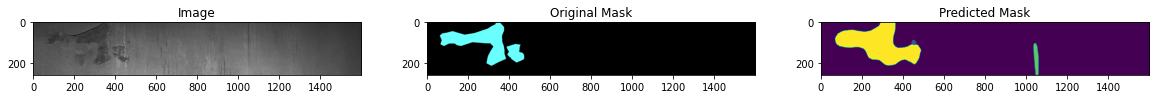

1/1 [==============================] - 0s 18ms/step


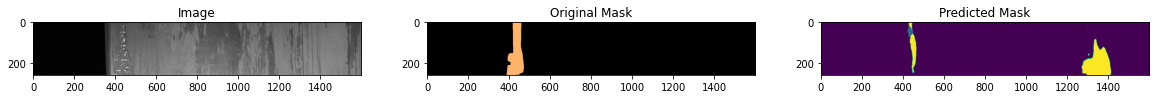

1/1 [==============================] - 0s 19ms/step


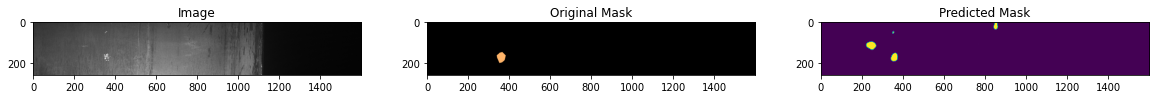

In [ ]:
# Visualizing the predicted mask for test data.
import random
ids = np.random.choice(lst, size = 20, replace = False)
for i in ids:
  image = cv2.imread(images_[i], cv2.IMREAD_UNCHANGED)
  # image = cv2.resize(image, (256, 256),  interpolation = cv2.INTER_AREA)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = np.expand_dims(image, axis=0)

  mask  = cv2.imread(masks_[i], cv2.IMREAD_UNCHANGED)
  # mask = cv2.resize(mask, (256, 256),  interpolation = cv2.INTER_AREA)

  pred = model1.predict(image,verbose=1)
  pred = tf.argmax(pred, axis=-1)

  fig = plt.figure(figsize=(20,14))

  ax1 = fig.add_subplot(1, 3, 1)
  ax1.imshow(image[0,:,:])
  ax2=fig.add_subplot(1, 3, 2)
  ax2.imshow(mask)
  ax3=fig.add_subplot(1, 3, 3)
  ax3.imshow(pred[0,:,:])
  ax1.title.set_text('Image')
  ax2.title.set_text('Original Mask')
  ax3.title.set_text('Predicted Mask')
  plt.show()

## **4.7 Applying Xception** 

In [85]:
model_X = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 1600, 3),
    classes=1000,
    classifier_activation="softmax",
)

In [86]:
model_X.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 1600,   0           []                               
                                3)]                                                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 799, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 799, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [87]:
for layer in model_X.layers:
  layer.trainable = False
input1 = model_X.output

u1 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (input1)
c1 = Conv2D(512, (3, 3), activation='elu', padding='same') (u1)
c1 = Conv2D(512, (3, 3), activation='elu', padding='same') (c1)

u2 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c1)
c2 = Conv2D(128, (3, 3), activation='elu', padding='same') (u2)
c2 = Conv2D(128, (3, 3), activation='elu', padding='same') (c2)

u3 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c2)
c3 = Conv2D(64, (3, 3), activation='elu', padding='same') (u3)
c3 = Conv2D(64, (3, 3), activation='elu', padding='same') (c3)

u4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c3)
c4 = Conv2D(32, (3, 3), activation='elu', padding='same') (u4)
c4 = Conv2D(32, (3, 3), activation='elu', padding='same') (c4)

u5 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c4)
c5 = Conv2D(16, (3, 3), activation='elu', padding='same') (u5)
c5 = Conv2D(16, (3, 3), activation='elu', padding='same') (c5)

# u6 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c5)
# c6 = Conv2D(8, (3, 3), activation='elu', padding='same') (u6)
# c6 = Conv2D(8, (3, 3), activation='elu', padding='same') (c6)

outputs = Conv2D(5, (1, 1), activation='softmax') (c5)

model_xcep = Model(inputs=model_X.input, outputs=[outputs])

In [88]:
model_xcep.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 1600,   0           []                               
                                3)]                                                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 799, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 799, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [89]:
import tensorflow as tf
from tensorflow.keras import callbacks
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
focal_loss = sm.losses.cce_dice_loss
model_xcep.compile(optim, focal_loss, metrics=[iou_score, "accuracy"])
callbacks = [callbacks.ModelCheckpoint('./best_model_xcep.h5', save_weights_only = True, save_best_only = True, \
                                       mode = 'max', monitor = 'val_iou_score', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor = 'val_iou_score', patience = 3, mode = 'max', verbose = 1,min_lr=0.0001)
]

In [62]:
BATCH_SIZE=10
train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = Dataloder(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

assert train_dataloader[0][0].shape == (BATCH_SIZE, 256, 1600, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, 256, 1600, 5)

print(train_dataloader[0][0].shape)
print(train_dataloader[0][1].shape)
print(len(train_dataloader))
print(len(test_dataloader))
type(train_dataset[0])

(10, 256, 1600, 3)
(10, 256, 1600, 5)
496
149


tuple

In [90]:
history = model_xcep.fit(train_dataloader, steps_per_epoch=(len(train_dataloader))//BATCH_SIZE, epochs=20,\
                    validation_data=test_dataloader, callbacks=callbacks)

Epoch 1/20
49/49 [==============================] - ETA: 0s - loss: 0.8858 - iou_score: 0.1885 - accuracy: 0.9108
Epoch 1: val_iou_score improved from -inf to 0.20605, saving model to ./best_model_xcep.h5
49/49 [==============================] - 146s 3s/step - loss: 0.8858 - iou_score: 0.1885 - accuracy: 0.9108 - val_loss: 0.8447 - val_iou_score: 0.2060 - val_accuracy: 0.9434 - lr: 0.0010
Epoch 2/20
49/49 [==============================] - ETA: 0s - loss: 0.8309 - iou_score: 0.2114 - accuracy: 0.9235
Epoch 2: val_iou_score improved from 0.20605 to 0.21173, saving model to ./best_model_xcep.h5
49/49 [==============================] - 137s 3s/step - loss: 0.8309 - iou_score: 0.2114 - accuracy: 0.9235 - val_loss: 0.8370 - val_iou_score: 0.2117 - val_accuracy: 0.9434 - lr: 0.0010
Epoch 3/20
49/49 [==============================] - ETA: 0s - loss: 0.8198 - iou_score: 0.2201 - accuracy: 0.9261
Epoch 3: val_iou_score improved from 0.21173 to 0.22335, saving model to ./best_model_xcep.h5
49/49

## Summary

In [42]:
from prettytable import PrettyTable
table = PrettyTable()
table.title = " Summary "
table.field_names = ['Model','No. of epochs', 'Validation lass', 'Validation IOU Score']

table.add_row(["Unet_with_resnet50","70",'0.52',"0.45"])
table.add_row(["VGG16","60", '0.58' ,"0.39"])
table.add_row(["Xception","20",'0.79',"0.24"])

print(table)

+-----------------------------------------------------------------------------+
|                                   Summary                                   |
+--------------------+---------------+-----------------+----------------------+
|       Model        | No. of epochs | Validation lass | Validation IOU Score |
+--------------------+---------------+-----------------+----------------------+
| Unet_with_resnet50 |       70      |       0.52      |         0.45         |
|       VGG16        |       60      |       0.58      |         0.39         |
|      Xception      |       20      |       0.79      |         0.24         |
+--------------------+---------------+-----------------+----------------------+
